# Regression Project 

### Project Title: Regression Project

#### Data Engineers: 
######        (1) Lizaan Botha
######        (2) Susheila Naick
######        (3) Amukelani Khosa
######        (4) Lutho Ntsepe
######        (5) Richard Marais
######        (6) Thabiso Nyokolodi


© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

Background Context
Back to Table of Contents

Purpose: The primary goal of this project is to assess the impact of CO2 emissions on the agricultural sector, identify important areas, and create an Autoregressive Integrated Moving Average model to predict sudden temperature shifts in a specific area, The project incorporates numerous visual tools to assist in comparing regions and identifying connections between sources. Studying the effects of climate change and creating sustainable plans for stakeholders, such as policymakers and agricultural companies
Details: Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
import matplotlib.cm as cm
import json
import pingouin as pg
import missingno as msno
import statsmodels.api as sm
import pmdarima as pm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,10)

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [69]:
df = pd.read_csv('co2_emissions_from_agri.csv')
pd.set_option('display.max_columns', None)
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [70]:
# Shape of the dataset
df.shape

(6965, 31)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

The values are in the right format, there is no further conversion is necessary.

In [72]:
(df.isna().mean() * 100).sort_values()

Area                                0.000000
Total Population - Female           0.000000
Total Population - Male             0.000000
Urban population                    0.000000
Rural population                    0.000000
Fires in organic soils              0.000000
Manure left on Pasture              0.000000
Fertilizers Manufacturing           0.000000
Food Processing                     0.000000
total_emission                      0.000000
Food Packaging                      0.000000
On-farm Electricity Use             0.000000
Agrifood Systems Waste Disposal     0.000000
Average Temperature °C              0.000000
Year                                0.000000
Food Transport                      0.000000
Pesticides Manufacturing            0.000000
Drained organic soils (CO2)         0.000000
Food Retail                         0.000000
Rice Cultivation                    0.000000
Savanna fires                       0.445083
Forest fires                        1.335248
Fires in h

<AxesSubplot:>

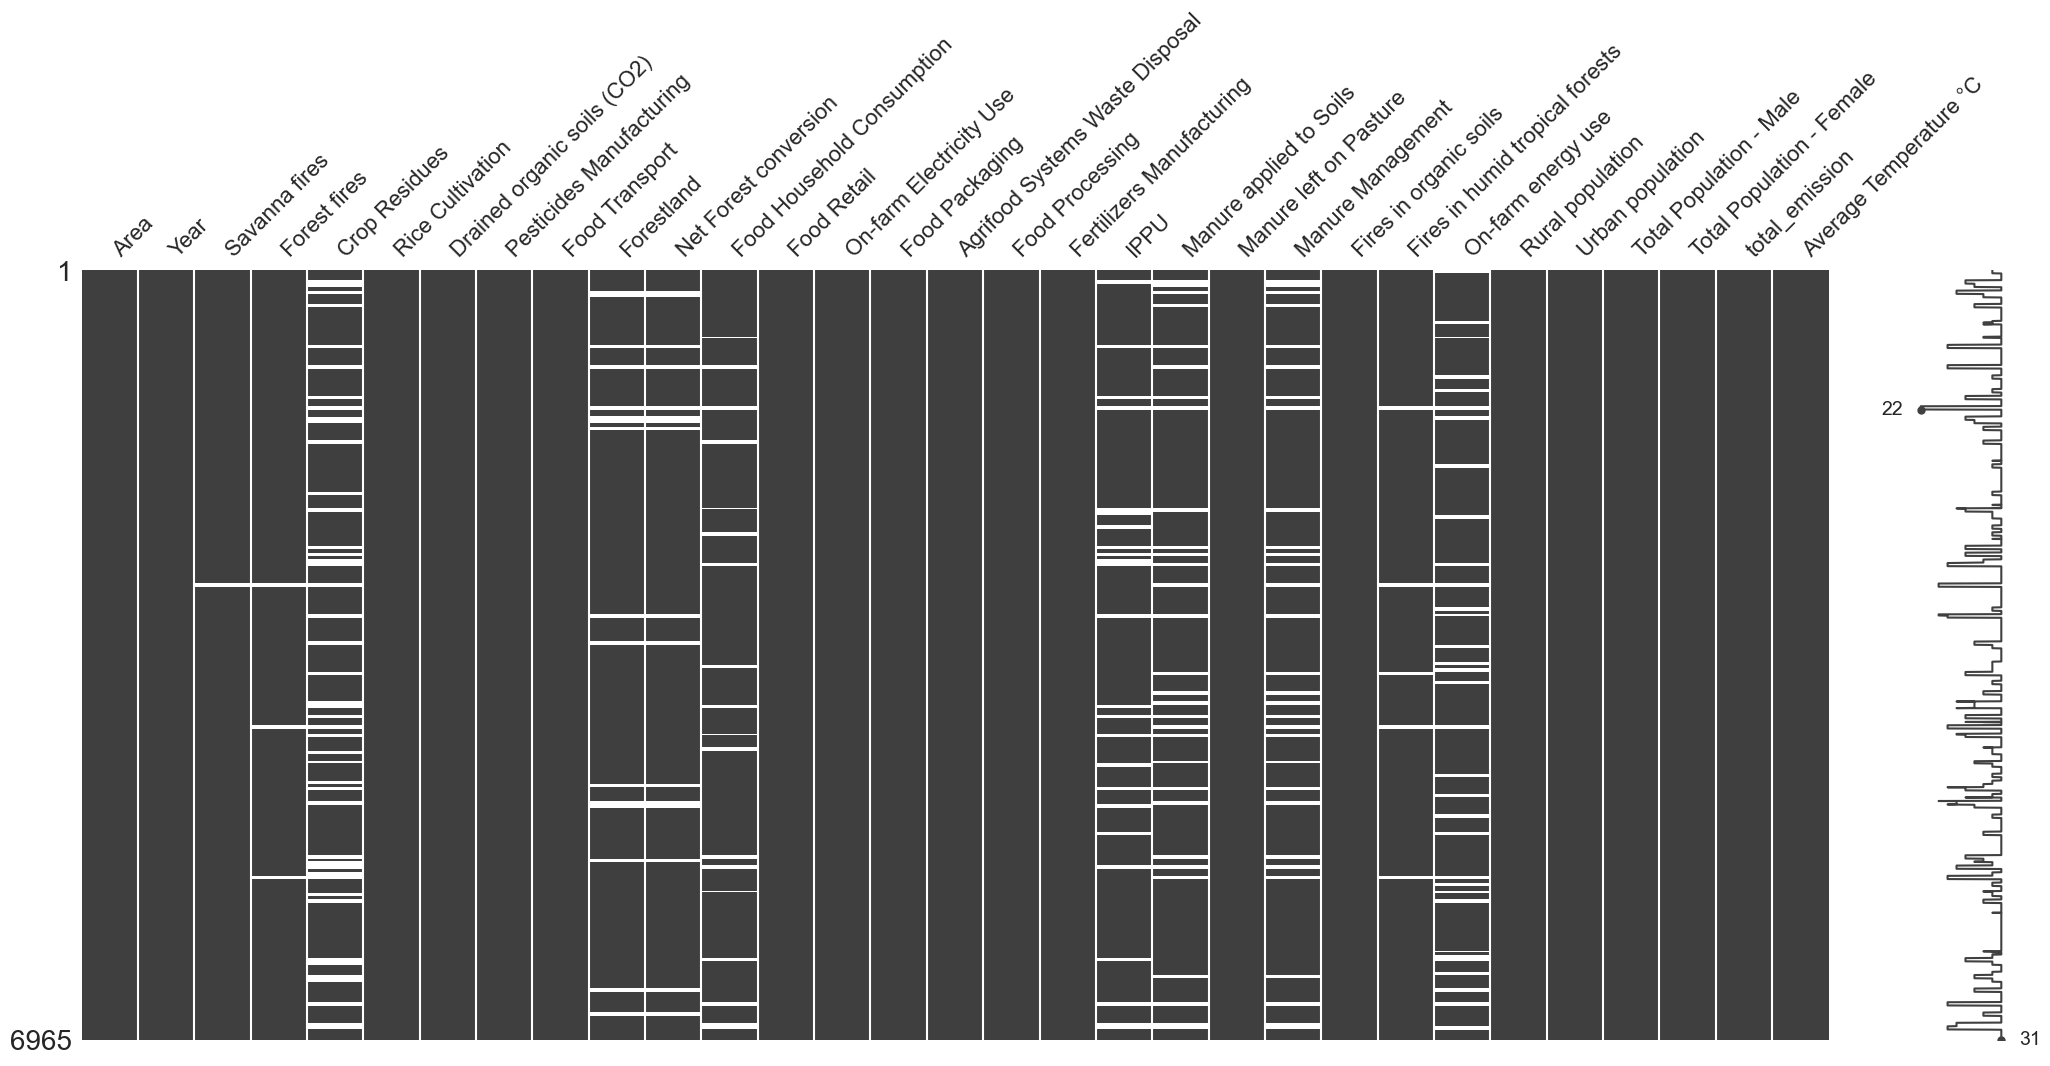

In [73]:
msno.matrix(df)

There are many missing values present in the dataset. Most of these are span over the whole 31 year period for an entire country hence the lack of information we will treat them as zeros.

In [74]:
def missingValue(col):
    missing = df[df[col].isna() == True]
    if missing['Area'].any() == False:
        pass
    else:
        print('Column name:',col,'\n', 'Countries :', missing['Area'].unique())
        print('-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')

for col in df.columns:
    missingValue(col)

Column name: Savanna fires 
 Countries : ['Holy See']
-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#
Column name: Forest fires 
 Countries : ['Holy See' 'Monaco' 'San Marino']
-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#
Column name: Crop Residues 
 Countries : ['American Samoa' 'Andorra' 'Anguilla' 'Aruba' 'Bahrain' 'Bermuda'
 'British Virgin Islands' 'Cayman Islands' 'Channel Islands'
 'China, Hong Kong SAR' 'China, Macao SAR' 'Cook Islands'
 'Equatorial Guinea' 'Falkland Islands (Malvinas)' 'Gibraltar' 'Greenland'
 'Guadeloupe' 'Guam' 'Holy See' 'Isle of Man' 'Kiribati' 'Liechtenstein'
 'Marshall Islands' 'Martinique' 'Mayotte' 'Monaco' 'Montserrat' 'Nauru'
 'Netherlands Antilles (former)' 'Niue' 'Northern Mariana Islands' 'Palau'
 'Palestine' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Pierre and Miquelon' 'Samoa'
 'San Marino' 'Seychelles' 'Singapore' 'Tokelau' 'Tonga'
 'Turks and Caicos Islands' 'Tuval

In [75]:
# Period the dataset covers.
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [76]:
num_of_countries = df['Area'].unique()
count = 0
for i in num_of_countries:
    count += 1
print('The number of Area that is considered in this dataset are: ', count)

The number of Area that is considered in this dataset are:  236


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

The dataset has been preprocessed for analysis and forecasting but there are still some missing data.   
We look at them one by one and decide the best cleaning practice.


- There are 11 categories with missing data and 3 of them where the data can be set to zero with high confidence. These are the Savanna and Forest fires and Fires in humid tropical forests.
- We have to make the assumption that due to conservation efforts the Net Forest Conversion is close to zero in the countries where we have no data. These are mainly tropical islands, small islands, city states or mostly desert country (UAE).
- Hence assuming that the Forestland hasn't changed significantly as we set the Net Forest Conversion to zero.   

The rest of the dataset has missing values for most of the 31 years of period. It 

In [77]:
# Filling all missing values with zeros in the lack of information
df.fillna(value = 0, inplace = True)

In [78]:
# Multiply the values by -1 where positive in the Forestland
df['Forestland'] = np.where(df['Forestland'] > 0, df['Forestland']*(-1), df['Forestland'])

In [79]:
# Check the integrity of our data - the sum of the numerical values of each industry in each row
# should be equal to the total emission.
integrity_check = df.iloc[:,2:25].sum(axis = 1)
equ = df['total_emission'] - integrity_check

equ = round(equ, 10)
equ = pd.DataFrame(equ)
diff = equ[equ[0] > 0]
diff


,0
11,243.8032
12,243.8032
13,243.8032
14,243.8032
15,243.8032
...,...
6960,153000.5964
6961,153000.5964
6962,153000.5964
6963,153000.5964


In [80]:
# As the data has been changed we need to adjust the total emission by subtracting the values that we changed
# to minus from the total emission to keep the data integrity.
df['total_emission'] = np.where(round(df['total_emission'] - integrity_check, 10) > 0, 
(df['total_emission']- round(df['total_emission'] - integrity_check, 10)), df['total_emission'])

In [81]:
integrity_rural_urban = df.iloc[:,26:27].sum(axis = 1)
integrity_male_female = df.iloc[:,28:29].sum(axis = 1)
pop_equ = integrity_rural_urban - integrity_male_female
pop_equ = pd.DataFrame(pop_equ)
pop = pd.DataFrame(np.where(pop_equ[0] == 0, True, False))
pop.value_counts()

0    
False    6965
Name: count, dtype: int64

It seems that the rural and urban population sum doesn't match with the sum of the total female and male population. Hence we have to choose which columns to keep to have a consistent data.   

In [82]:
df.drop(['Rural population', 'Urban population'], inplace=True, axis=1)

<AxesSubplot:>

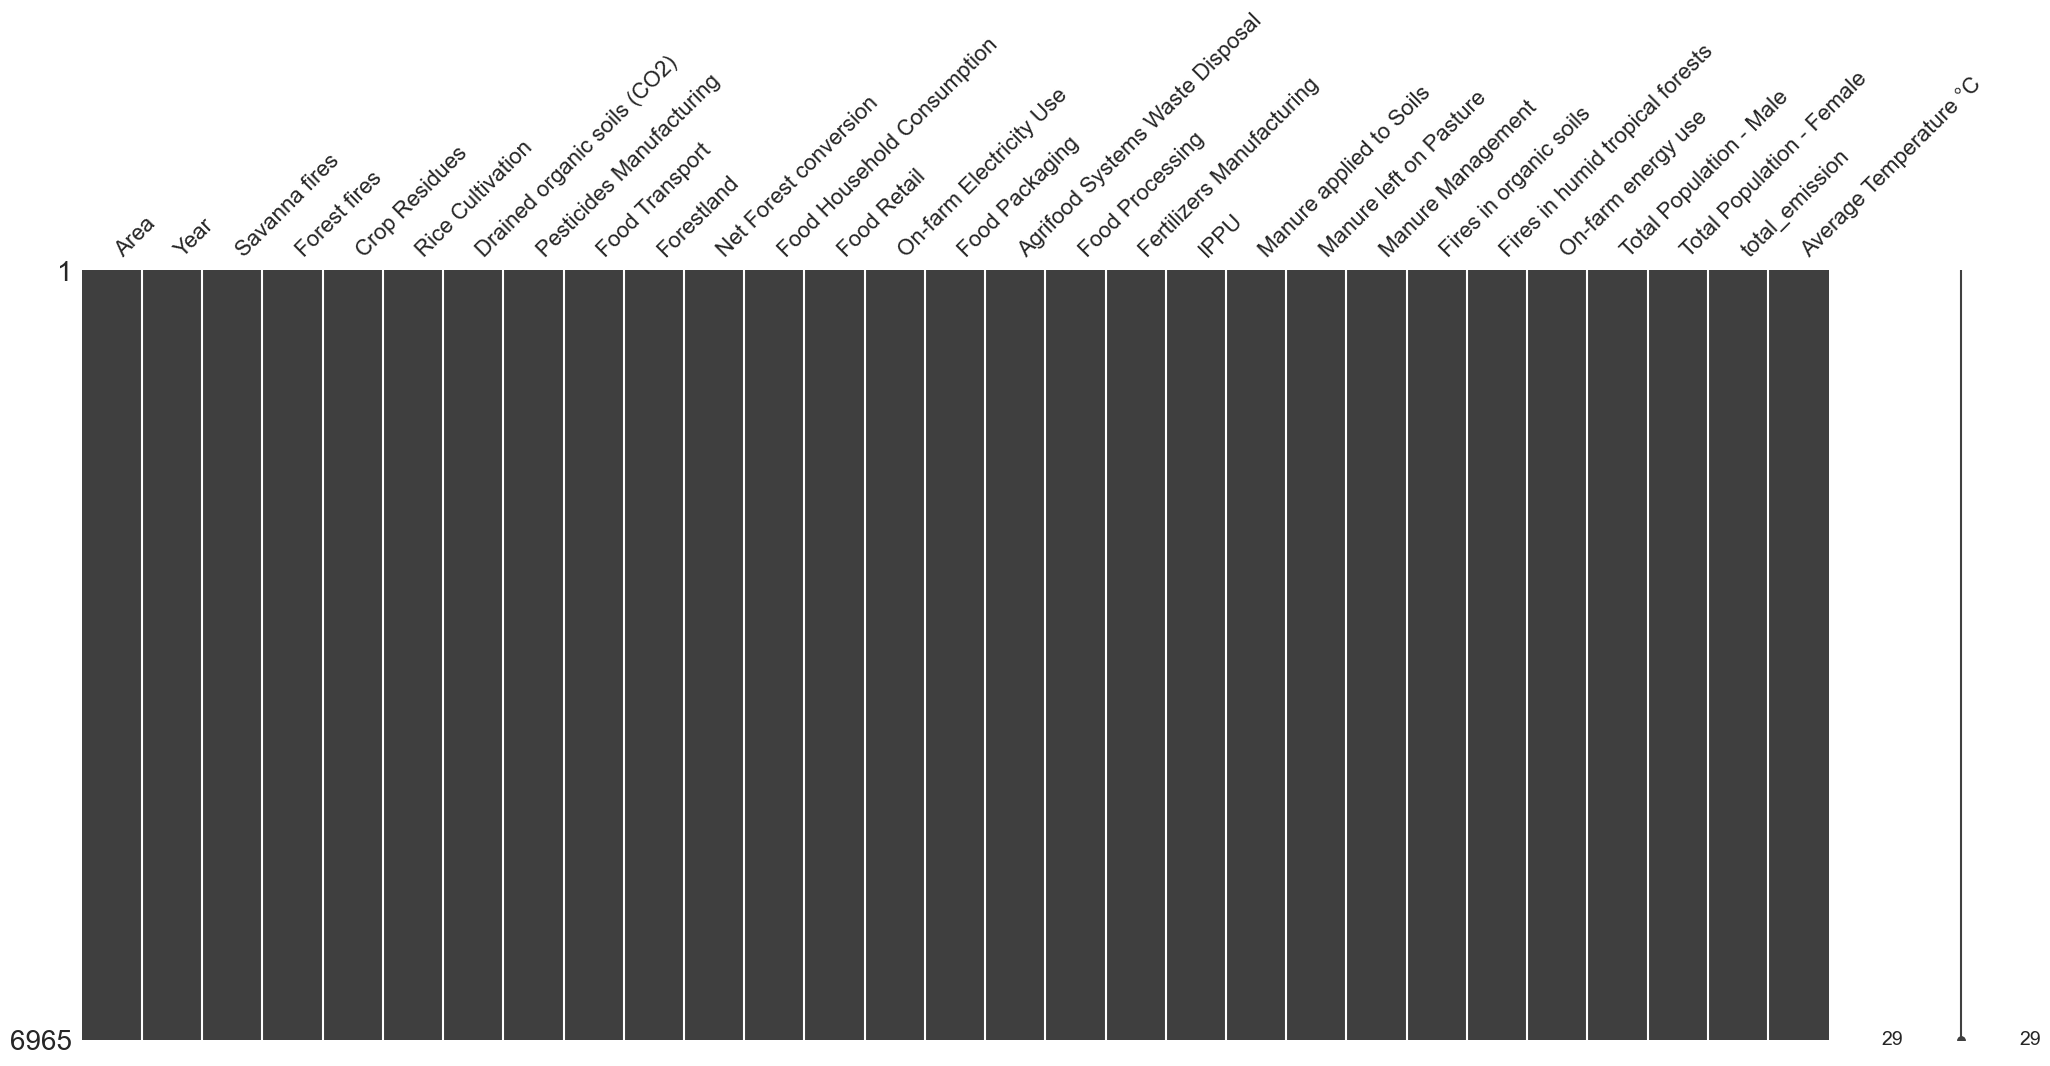

In [83]:
msno.matrix(df)

Replacing some of the countries name with a shorter name.

In [84]:
df = df.replace(to_replace = ["Bolivia (Plurinational State of)",
                         "Democratic People's Republic of Korea",
                         "Democratic Republic of the Congo",
                         "Ethiopia PDR",
                         "Falkland Islands (Malvinas)",
                         "Iran (Islamic Republic of)",
                         "Lao People's Democratic Republic",
                         "Micronesia (Federated States of)",
                         "Netherlands (Kingdom of the)",
                         "Netherlands Antilles (former)",
                         "Republic of Moldova",
                         "Russian Federation",
                         "Sudan (former)",
                         "Syrian Arab Republic",
                         "United Republic of Tanzania",
                         "United States Virgin Islands",
                         "Venezuela (Bolivarian Republic of)",
                         "Viet Nam",
                         "Republic of Korea",
                         "Czechia",
                         "China, Taiwan Province of",
                         "Belgium-Luxembourg"],
            value = ['Bolivia',
                     'North Korea',
                     'Congo',
                     'Ethiopia',
                     'Falkland Islands',
                     'Iran',
                     'Laos',
                     'Micronesia',
                     'Netherlands',
                     'Netherlands Antilles',
                     'Moldova',
                     'Russia',
                     'Sudan',
                     'Syria',
                     'Tanzania',
                     'US Virgin Islands',
                     'Venezuela',
                     'Vietnam',
                     'South Korea',
                     'Czech Republic',
                     'Taiwan',
                     'Luxembourg'])

## Feature Engineering

We add where the country is located by continent and region.

In [85]:
continents = json.load(open('continents.json','r'))
world_regions = json.load(open('world_regions.json','r'))

def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

df['Continents'] = df.loc[:,'Area'].apply(assign_continent)

def assign_region(area):
    for continent, country in world_regions.items():
        if area in country:
            return continent
df['World_regions'] = df.loc[:,'Area'].apply(assign_region)

Also adding an extra column to the dataset for the total population, calculated from the total male and female population for each year.

In [86]:
df['total_population'] = df.loc[:,'Total Population - Male'] + df.loc[:,'Total Population - Female']

In [87]:
print(df.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Total Population - Male', 'Total Population - Female',
       'total_emission', 'Average Temperature °C', 'Continents',
       'World_regions', 'total_population'],
      dtype='object')


We exclude China from the dataset as it's a duplicate. China here represents the mainland and the territorial parts like Macao, Hond Kong etc that included in the dataset separately.

In [88]:
df = df[df['Area'] != 'China']

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


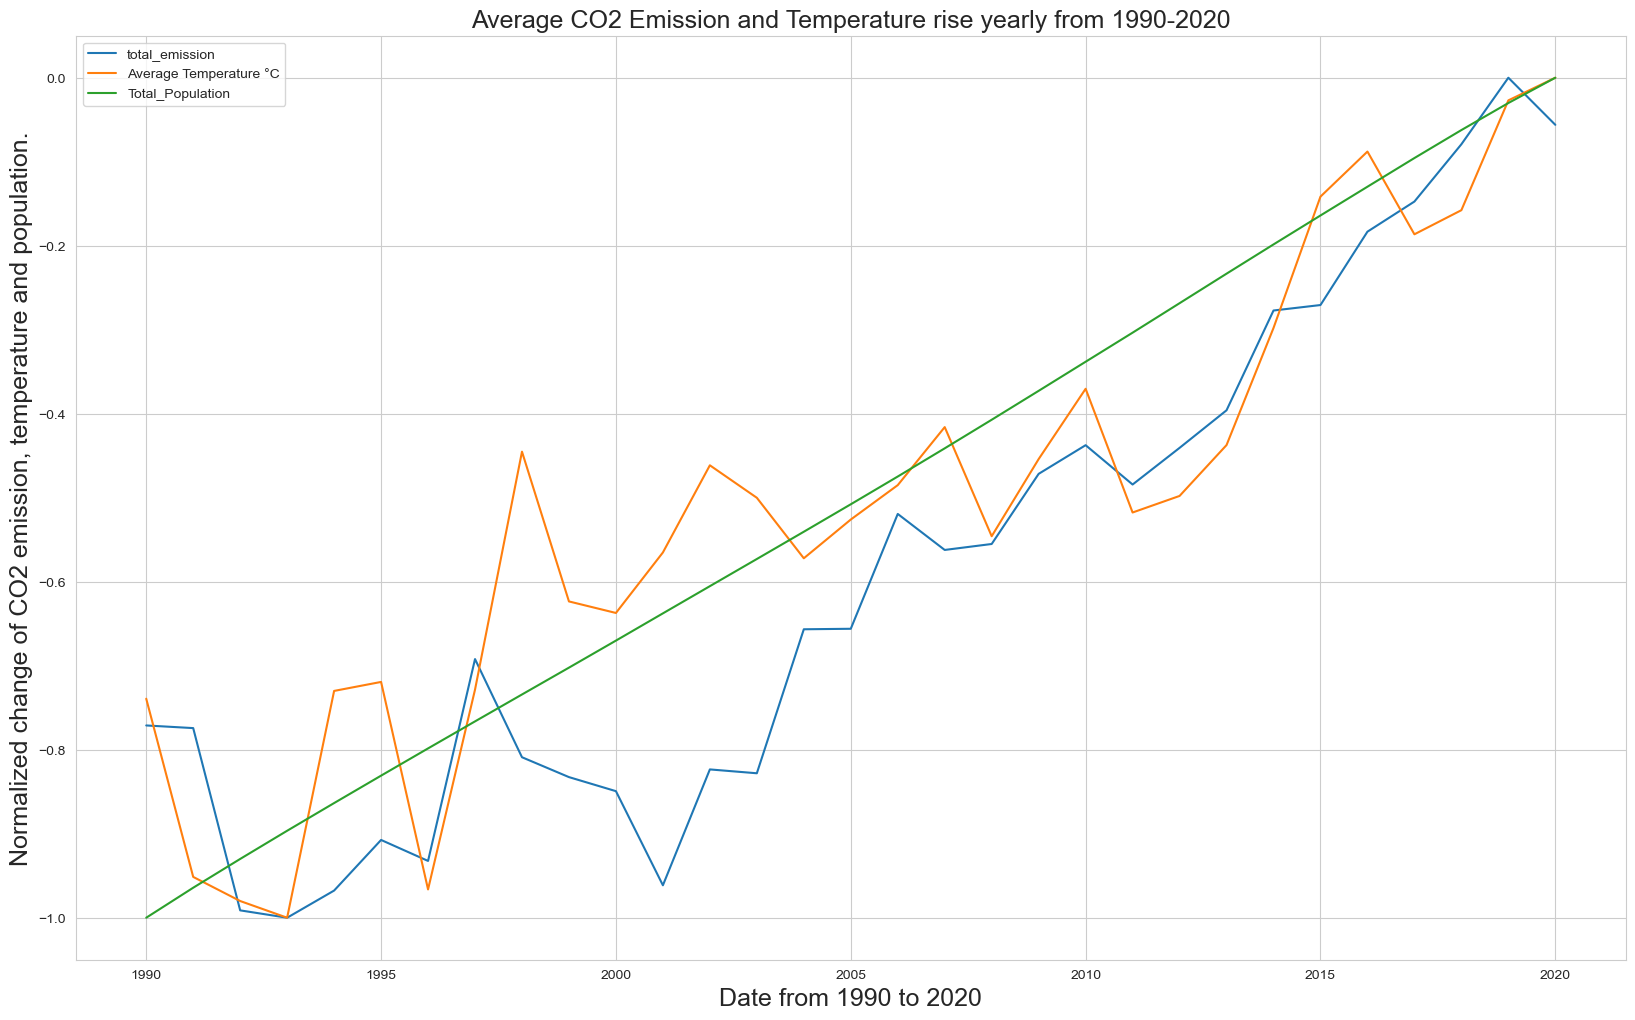

In [89]:
def normalize(df):
    n = (df-df.max())/(df.max()-df.min())
    return n

df_year = df.groupby('Year')[['total_emission','Average Temperature °C']].mean()
df_pop = df.groupby('Year')['total_population'].sum()  #['Total_Population_Male','Total_Population_Female'].sum()
df_year['Total_Population'] = df_pop
df_year_norm = normalize(df_year)

df_year_norm.plot(figsize=(20, 12))
plt.title('Average CO2 Emission and Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of CO2 emission, temperature and population.', fontsize = 18)
plt.show()

From the graph above it can be seen that there is a direct correlation between the CO2 emission with temperature rise and the population growth.   
These emissions only about 1/5th of the total CO2 emission wordwide but the direct proportionality and upward trend can be seen from this dataset as well.

In [90]:
data_mean_tmp_emi = df.groupby(['Year', 'Continents'])[['total_emission', 'Average Temperature °C']].agg('mean').reset_index()
data_sum_pop = df.groupby(['Year', 'Continents'])['total_population'].agg('sum').reset_index()
data_joined = pd.merge(data_mean_tmp_emi, data_sum_pop, how='left', left_on=['Year', 'Continents'], right_on=['Year', 'Continents'])

# Define MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
data_joined2 = scaler.fit_transform(data_joined[['total_emission', 'Average Temperature °C', 'total_population']])

# Convert back to DataFrame
data_joined2 = pd.DataFrame(data_joined2, columns=['total_emission', 'Average Temperature °C', 'total_population'])

# Concatenate Year and Continents columns with the normalized data
data_joined2 = pd.concat([data_joined[['Year', 'Continents']], data_joined2], axis=1)

# Plotting
sns.lineplot(data=data_joined2, x='Year', y='total_emission', hue='Continents', palette='dark', style='Continents', markers=True)
plt.title('Total Emission rise yearly from 1990-2020', fontsize=18)
plt.xlabel('Date from 1990 to 2020', fontsize=18)
plt.ylabel('Normalized change of total-emission.', fontsize=18)
plt.show()

sns.lineplot(data=data_joined2, x='Year', y='total_population', hue='Continents', palette='dark', style='Continents', markers=True)
plt.title('Population rise yearly from 1990-2020', fontsize=18)
plt.xlabel('Date from 1990 to 2020', fontsize=18)
plt.ylabel('Normalized change of population.', fontsize=18)
plt.show()

sns.lineplot(data=data_joined2, x='Year', y='Average Temperature °C', hue='Continents', palette='dark', style='Continents', markers=True)
plt.title('Temperature rise yearly from 1990-2020', fontsize=18)
plt.xlabel('Date from 1990 to 2020', fontsize=18)
plt.ylabel('Normalized change of temperature.', fontsize=18)
plt.show()



NameError: name 'MinMaxScaler' is not defined

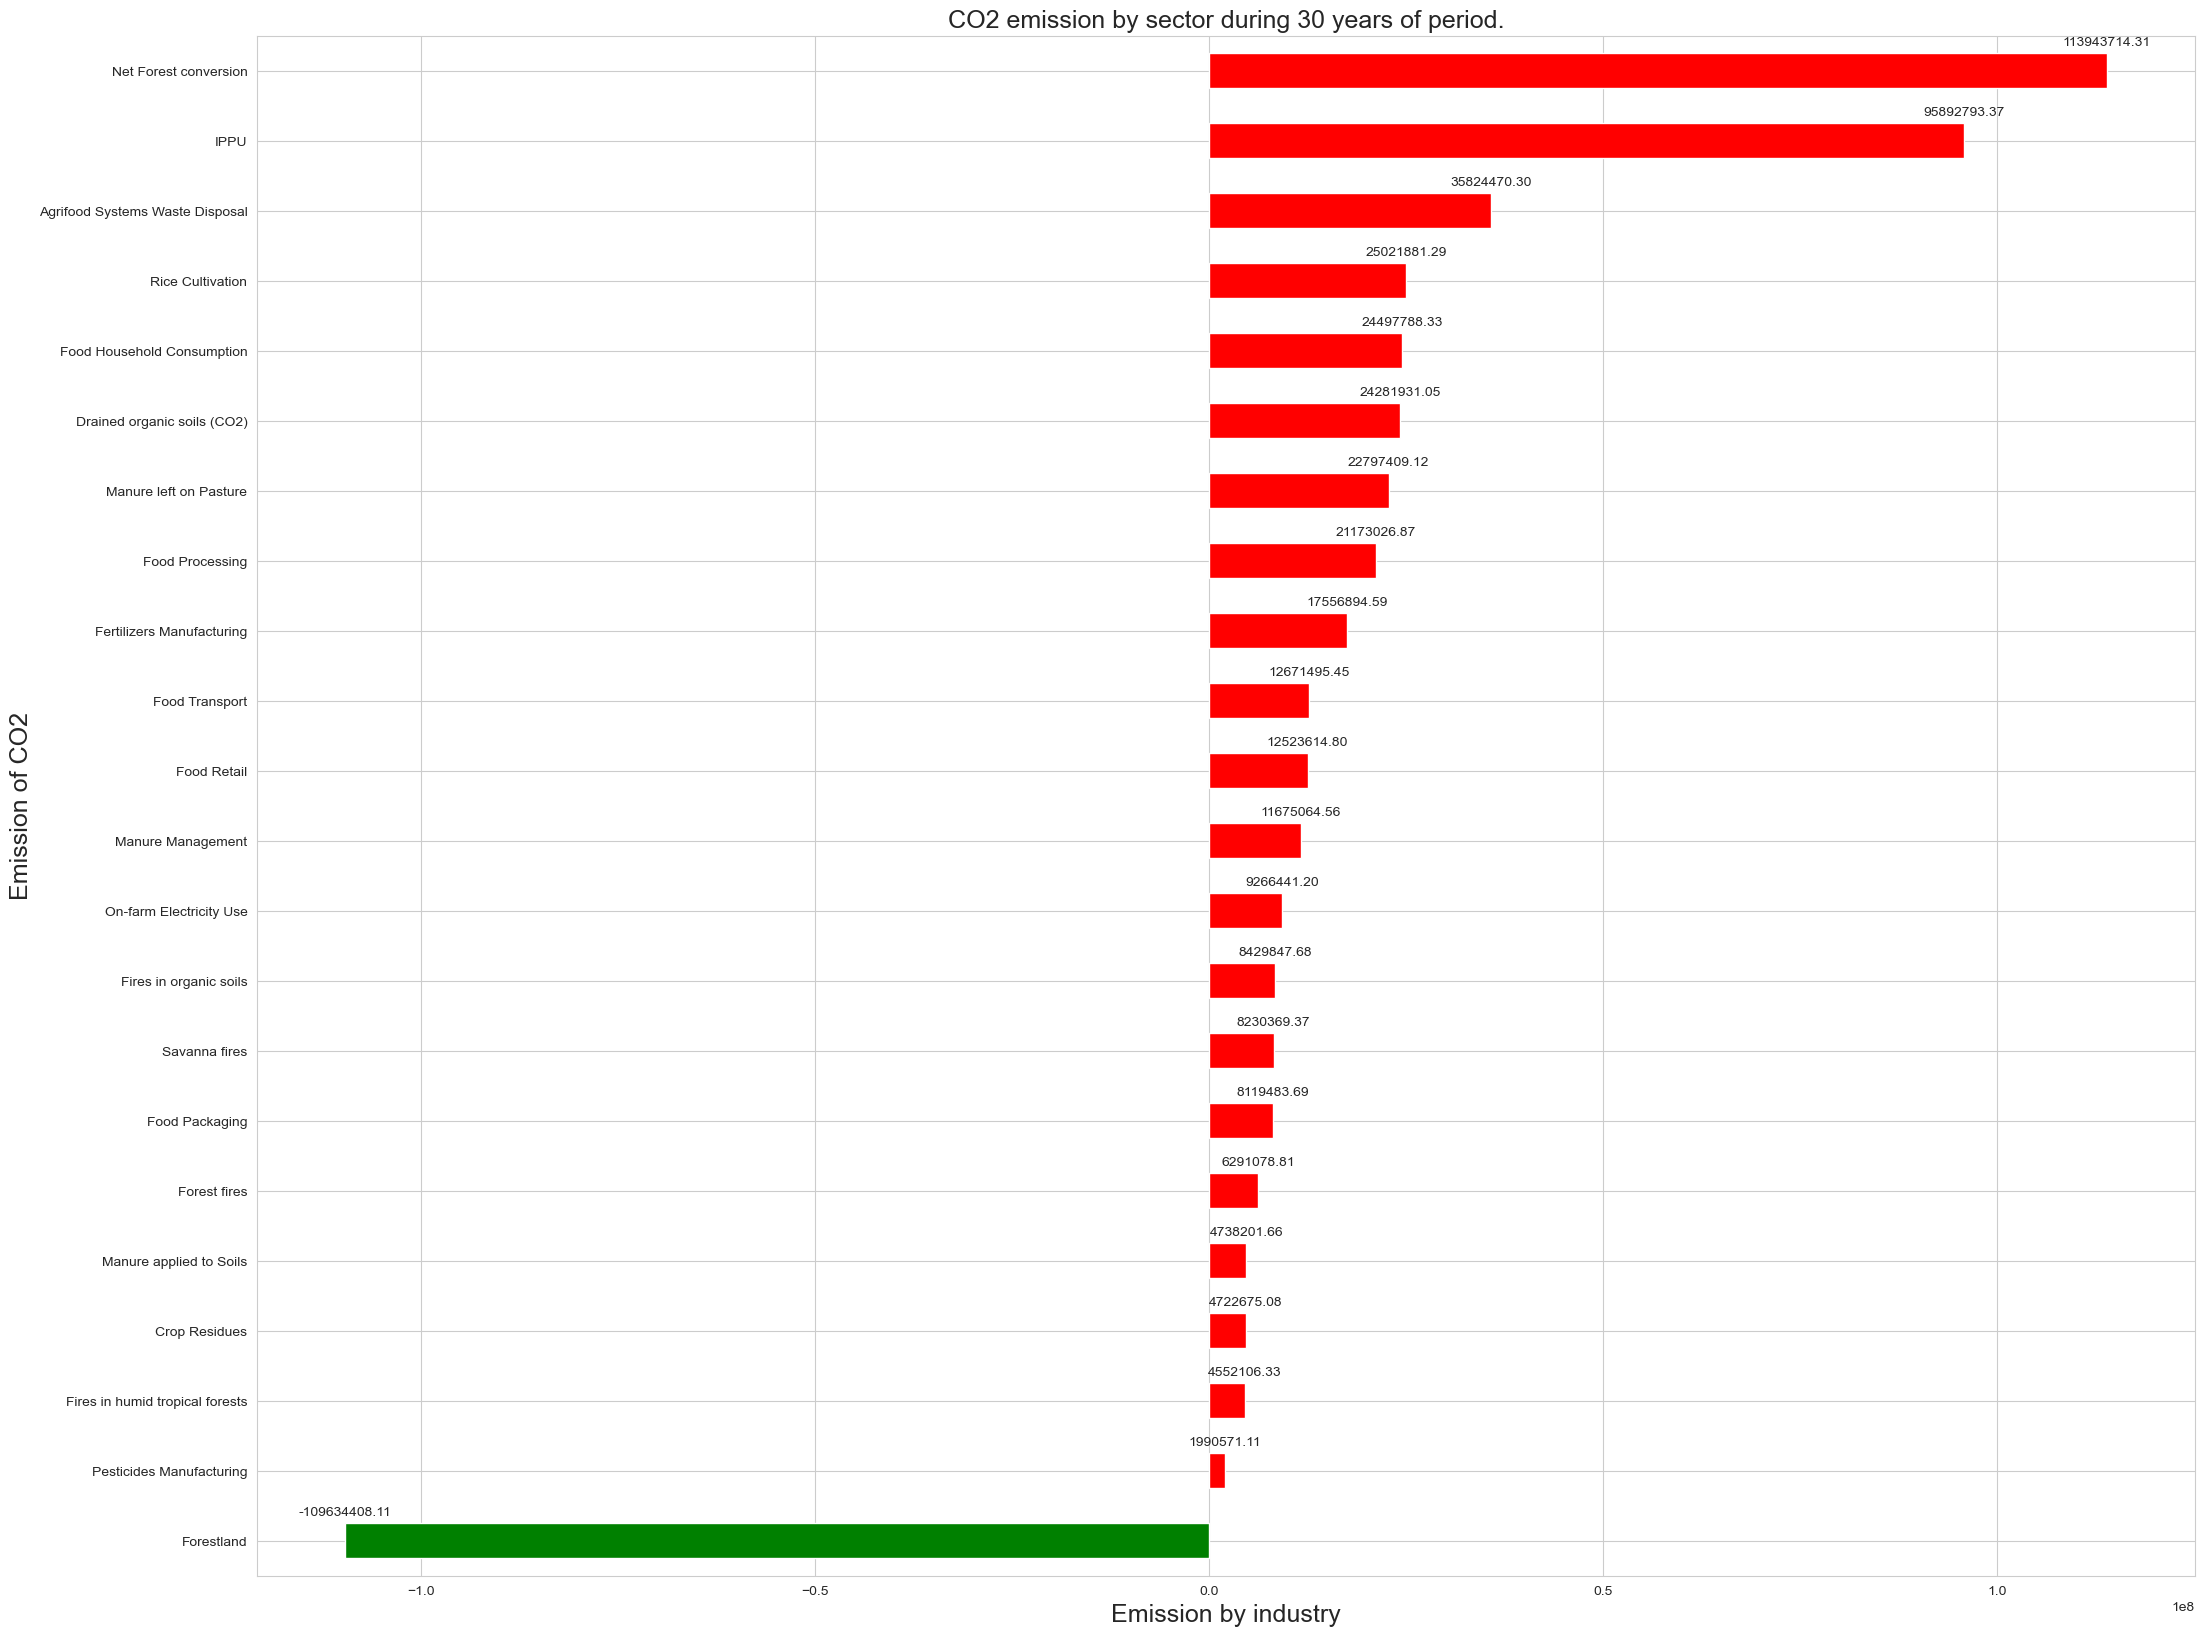

In [61]:

df_emitter = df.iloc[:,1:24].groupby('Year').sum()
sns.set_style('whitegrid')
df_emitter_tot = df_emitter.sum(axis = 0).sort_values()

colors = ['green' if (x < 0) else 'red' for x in df_emitter_tot]
g = df_emitter_tot.plot(kind = 'barh', 
                        figsize = (25, 20), 
                        color = colors, 
                        rot = 0) 
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

for p in g.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+ 1.3* p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

If we break down the emissions by sector for the whole dataset by summing up the emissions the total emissions over the 31 years period and plotting by the individual sources    
it can be seen that the only negative emission is coming from the Forestland as we would expect.     

The most polluting among the agricultural sources is coming from the Net Forest Conversion followed by emissions from industrial processes and product use.    
These were most significant CO2 emitters between 1990 and 2020.

In [91]:
df_totalemi = df.groupby('Area')['total_emission'].sum()
df_totalemi = pd.DataFrame(df_totalemi).sort_values('total_emission', ascending = False)

df_top10 = df_totalemi.head(10).reset_index()
df_top10['Proportion_(%)'] = (df_top10['total_emission'] / df_top10['total_emission'].sum() )* 100
df_top10

,Area,total_emission,Proportion_(%)
0,"China, mainland",5.662423e+07,27.300614
1,Brazil,3.659621e+07,17.644371
2,Indonesia,2.821637e+07,13.604145
3,United States of America,2.319088e+07,11.181175
4,India,1.972033e+07,9.507892
5,Congo,1.706524e+07,8.227776
6,Japan,6.923093e+06,3.337877
7,Mexico,6.697904e+06,3.229305
8,Germany,6.229363e+06,3.003404
9,Canada,6.146473e+06,2.963440


The top 10 countries that contributed to most of the emissions. China is the leading emitter followed by Brazil where from China alone, about 10% more CO2 emission is coming than from the second most polluting country. 

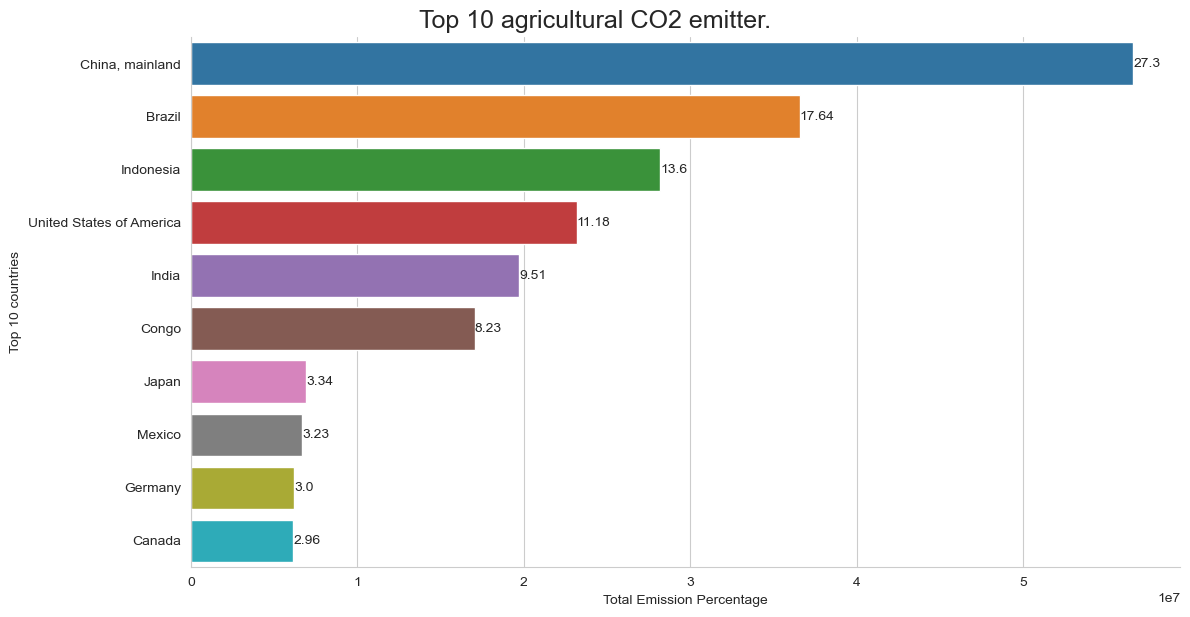

In [92]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_top10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Top 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission Percentage',
      ylabel = 'Top 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_top10['Proportion_(%)'], 2), label_type='edge')
plt.show()

In [97]:
top5 = ['China, mainland','Brazil','Indonesia','United States of America', 'India']
df_top_bool = df['Area'].isin(top5)
df_top5 = df[df_top_bool]

df_top5_grp = df_top5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_top5_grp.reset_index()
sns.catplot(data = df_top5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_top5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the top 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

KeyError: "Columns not found: 'Food_Transport', 'Rice_Cultivation', 'Pesticides_Manufacturing', 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Net_Forest_conversion', 'Crop_Residues', 'Drained_organic_soils_(CO2)', 'Manure_applied_to_Soils', 'Fires_in_organic_soils', 'Food_Household_Consumption', 'Savanna_fires', 'On-farm_Electricity_Use', 'Manure_left_on_Pasture', 'On-farm_energy_use', 'Food_Processing', 'Food_Retail', 'Manure_Management', 'Forest_fires', 'Fertilizers_Manufacturing', 'Fires_in_humid_tropical_forests'"

In [98]:
df_bottom10 = df_totalemi.tail(10).reset_index()
df_bottom10['Proportion_(%)'] = (df_bottom10['total_emission'] / df_bottom10['total_emission'].sum() )* 100
df_bottom10

,Area,total_emission,Proportion_(%)
0,Georgia,-4.730578e+04,0.766362
1,Latvia,-5.110531e+04,0.827916
2,Serbia and Montenegro,-5.933866e+04,0.961297
3,Slovenia,-6.546388e+04,1.060527
4,Finland,-9.975058e+04,1.615978
5,Solomon Islands,-1.562589e+05,2.531424
6,Bulgaria,-3.108318e+05,5.035533
7,Romania,-4.778241e+05,7.740840
8,Chile,-5.811333e+05,9.414469
9,Russia,-4.323756e+06,70.045654


The bottom 10 countries that contributed the least to the emissions. The least polluting from the agricultural sector is Russia due the forest/land area coverage followed by Chile and Romania.

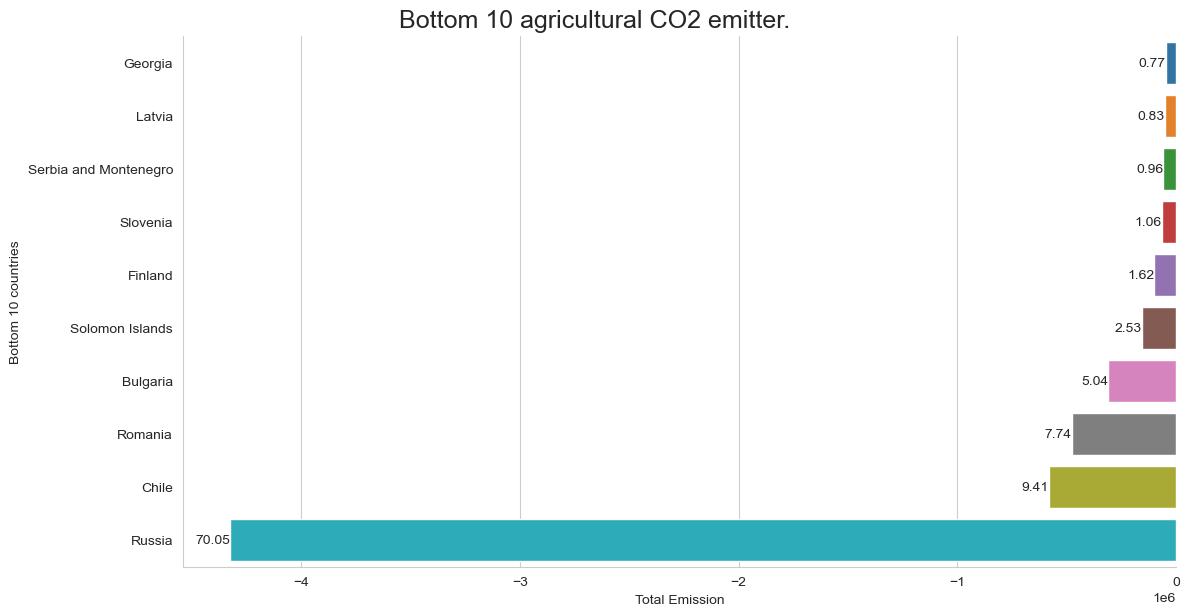

In [99]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_bottom10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Bottom 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Bottom 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_bottom10['Proportion_(%)'], 2), label_type='edge')
plt.show()

In [100]:
bottom5 = ['Russia','Chile','Romania','Bulgaria', 'Finland']
df_bottom_bool = df['Area'].isin(bottom5)
df_bottom5 = df[df_bottom_bool]

df_bottom5_grp = df_bottom5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_bottom5_grp.reset_index()
sns.catplot(data = df_bottom5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_bottom5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the bottom 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

KeyError: "Columns not found: 'Food_Transport', 'Rice_Cultivation', 'Pesticides_Manufacturing', 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Net_Forest_conversion', 'Crop_Residues', 'Drained_organic_soils_(CO2)', 'Manure_applied_to_Soils', 'Fires_in_organic_soils', 'Food_Household_Consumption', 'Savanna_fires', 'On-farm_Electricity_Use', 'Manure_left_on_Pasture', 'On-farm_energy_use', 'Food_Processing', 'Food_Retail', 'Manure_Management', 'Forest_fires', 'Fertilizers_Manufacturing', 'Fires_in_humid_tropical_forests'"

Looking at the average temperature change due to carnon emission year by year in the different regions of the world. From the next three plot we can conclude that the most effected by the CO2 emission is Europe and the second one is Asia.

In [101]:
df_1990_1999 = df.query('Year >= 1990 and Year <= 1999')
df_2000_2009 = df.query('Year >= 2000 and Year <= 2009')
df_2010_2020 = df.query('Year >= 2010 and Year <= 2020')

def emissionBoxPlot(dataframe, title):
      sns.set_style('whitegrid')
      g = sns.catplot(x = 'Year',
                  y = 'Average_Temperature_C',
                  data = dataframe,
                  kind = 'box',
                  hue = 'Continents',
                  height=10, 
                  aspect=2.5
                  )
      g.fig.suptitle('Average temperature change by year from ' + title, fontsize = 18)
      g.set(xlabel = 'Year',
            ylabel = 'Average change of temperature.')
      plt.show()

In [103]:
emissionBoxPlot(df_1990_1999, '1990 to 1999.')

ValueError: Could not interpret input 'Average_Temperature_C'

In [104]:
emissionBoxPlot(df_2000_2009, '2000 to 2009.')

ValueError: Could not interpret input 'Average_Temperature_C'

In [105]:
emissionBoxPlot(df_2010_2020, '2010 to 2020.')

ValueError: Could not interpret input 'Average_Temperature_C'

Looking at the same graph from a different perspective reveals that most of the agricultural CO2 emission is coming from Asia.   
It can be seen from the plot that the population is also the largest in Asia but the average temperature change effects Europe the most followed by Asia.

In [106]:
g = sns.relplot(x = 'total_emission',
                y = 'Average_Temperature_C',
                data = df,
                size = 'total_population',
                hue = 'Continents',
                height = 10,
                aspect = 3
                )
sns.kdeplot(x = 'total_emission',
            y = 'Average_Temperature_C',
            data = df,
            kind = 'kde',
            hue = 'Continents',
            fill = True,
            common_norm = False,
            alpha = 0.2
            )
g.fig.suptitle('Average temperature change vs total emission over 30 years.', fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Average Temperature Change in Celsius degree')

plt.show()

ValueError: Could not interpret value `Average_Temperature_C` for parameter `y`

## Emission by regions

In [ ]:
summed_emission = df.groupby(['World_regions','Continents'])[('total_emission')].agg('sum').sort_values().reset_index()

sns.barplot(data = summed_emission, x = 'World_regions', y = 'total_emission')
plt.title('CO2 emission by region', fontsize = 18)
plt.xlabel('Emission by REgions', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
summed_emission

In [107]:
df_europe = df[df['Continents']=='Europe']
df_northAmerica = df[(df['Continents']=='North_America') & (df['World_regions'] != 'North America')]
df_NA = df[(df['Continents'] == 'North_America') & (df['World_regions'] == 'North America')]
df_southamerica = df[(df['Continents']=='South_America')]
df_africa = df.query("Continents == 'Africa'")
df_CA = df[(df['Continents'] == 'Asia') & (df['World_regions'] == 'Central Asia') ]
df_asia = df[(df['Continents'] == 'Asia') & (df['World_regions'] != 'Central Asia') ]
df_AU_NZ = df[(df['Continents'] == 'Oceania') & (df['World_regions'] == 'Australia And New Zealand ')]
df_oceania = df[(df['Continents'] == 'Oceania') & (df['World_regions'] != 'Australia And New Zealand ')]

def region_kdePlot(dataframe, xsettings):

    marker = itertools.cycle(['o','.', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_'])
    markers = [next(marker) for i in range(len(dataframe['Area'].unique()))]

    g = sns.FacetGrid(dataframe,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = xsettings,
                  ylim = (-3,4),
                  sharex = True
                  )
    g.map(sns.kdeplot,
        "total_emission",
        "Average_Temperature_C",
        fill = True,
        alpha = 0.5)
    g.map(sns.scatterplot,
        "total_emission",
        "Average_Temperature_C",
        hue = dataframe['Area'],
        size = dataframe['total_population'],
        markers = markers)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.set(xlabel = 'Emission of CO2 (ton)',
        ylabel = 'Temperture raise in Celsius degree')
    g.add_legend()
    plt.show()

### Europe

Europe has been divided into four regions. Each plot shows a different region and the scatterplot represents the countris in that region and the size of the points are the total population.
It can be seen that the points are separated into groups according to a country's total emission.
Multiple dots for the same color represents the emissions yearly and it's overlapping with the density plot that represents the emission density hotspots.

KeyError: "['Average_Temperature_C'] not in index"

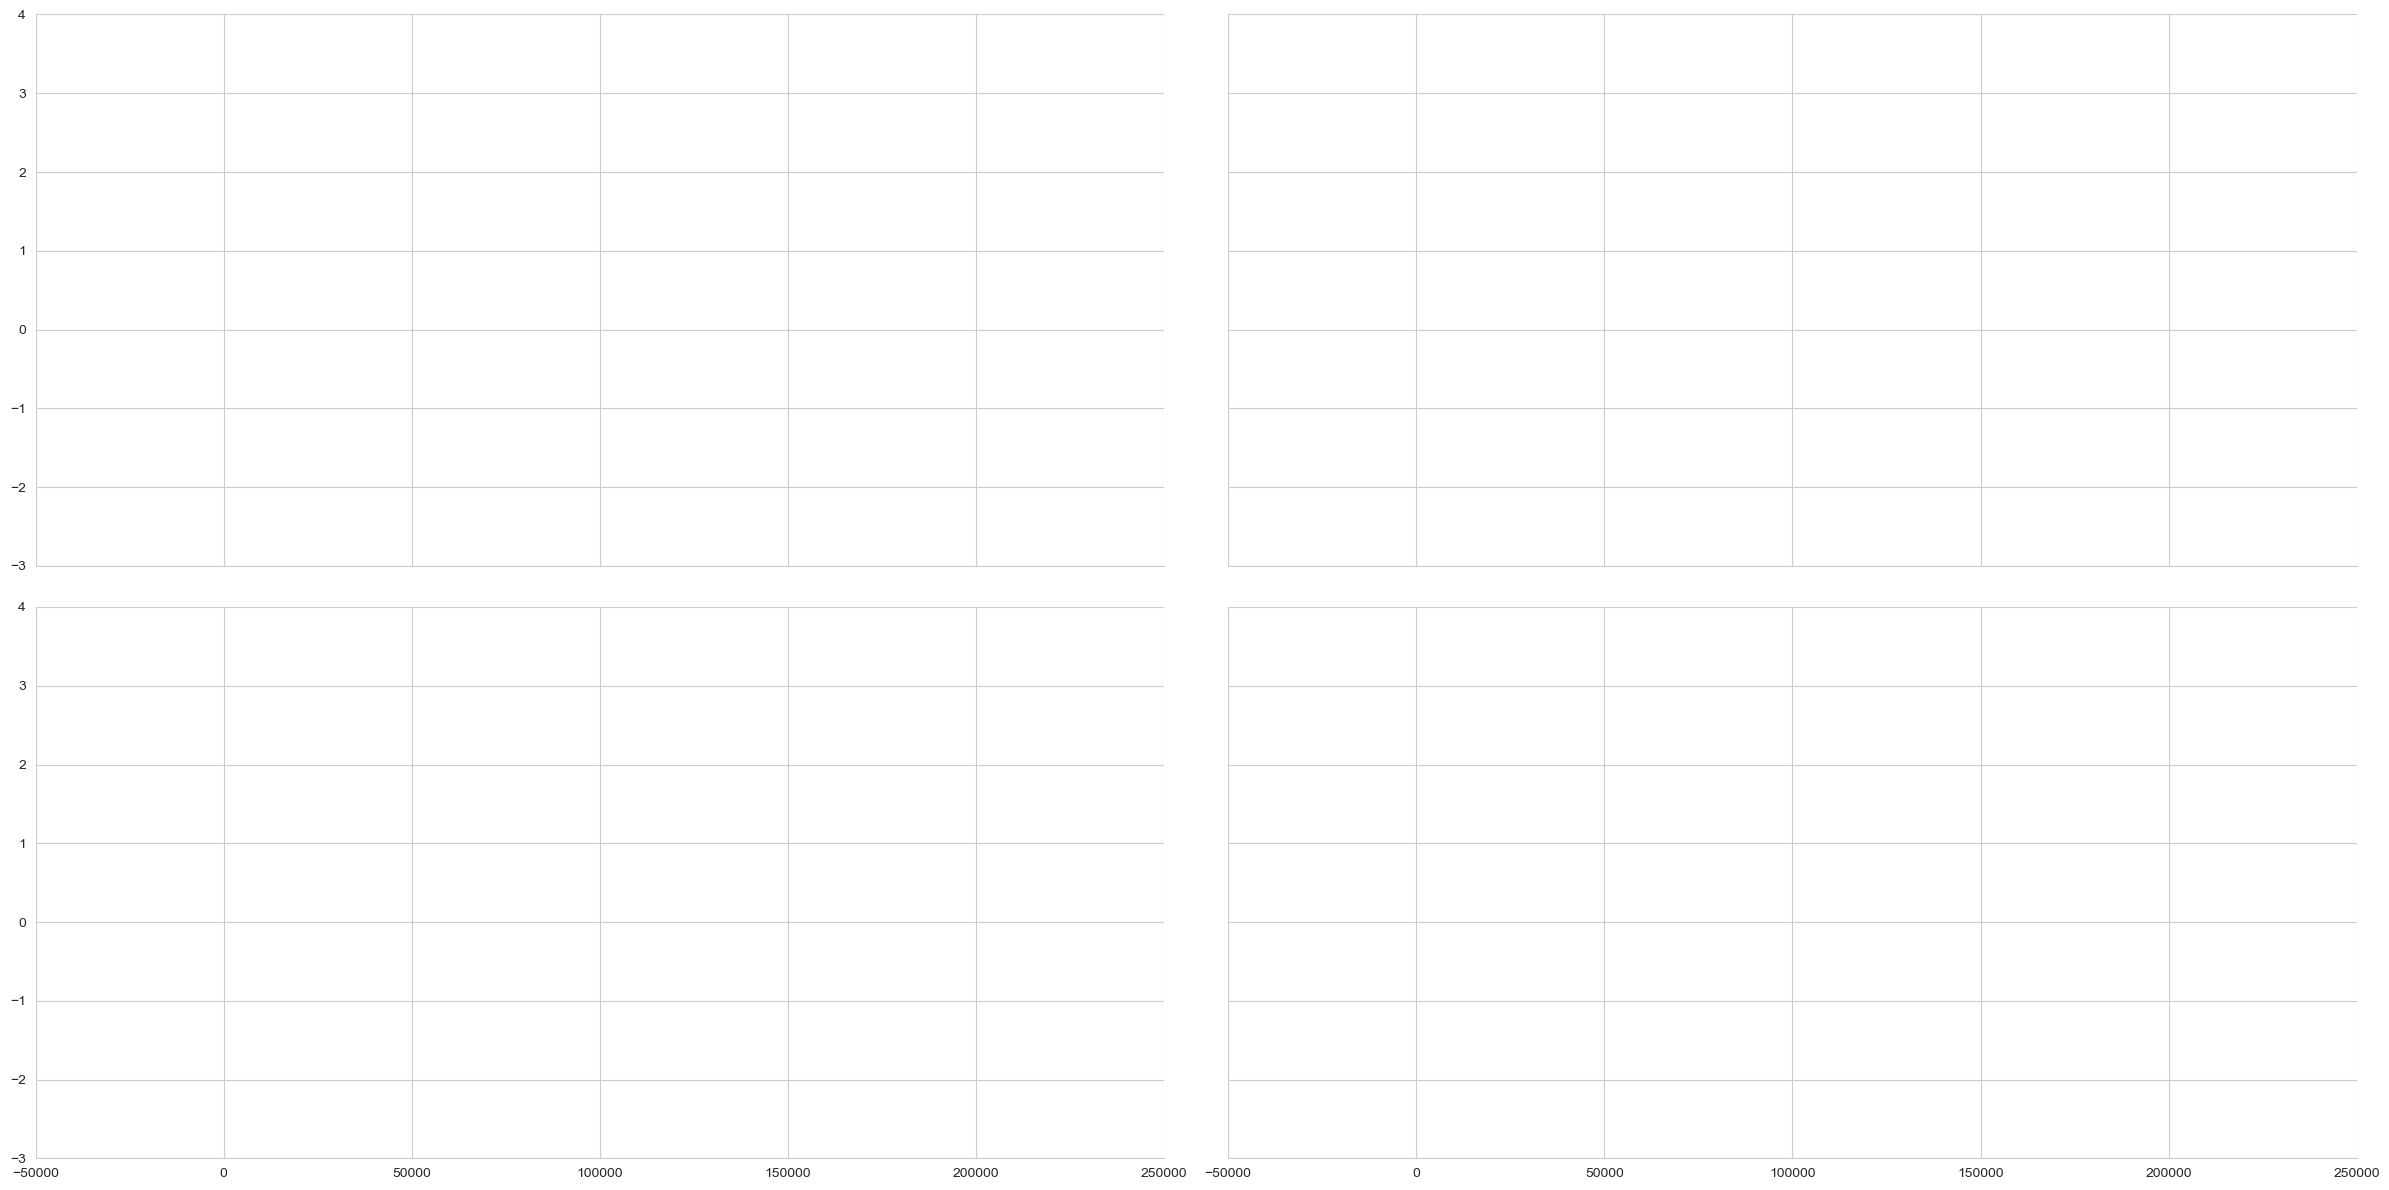

In [108]:
region_kdePlot(df_europe, (-50000,250000))

### North America


KeyError: "['Average_Temperature_C'] not in index"

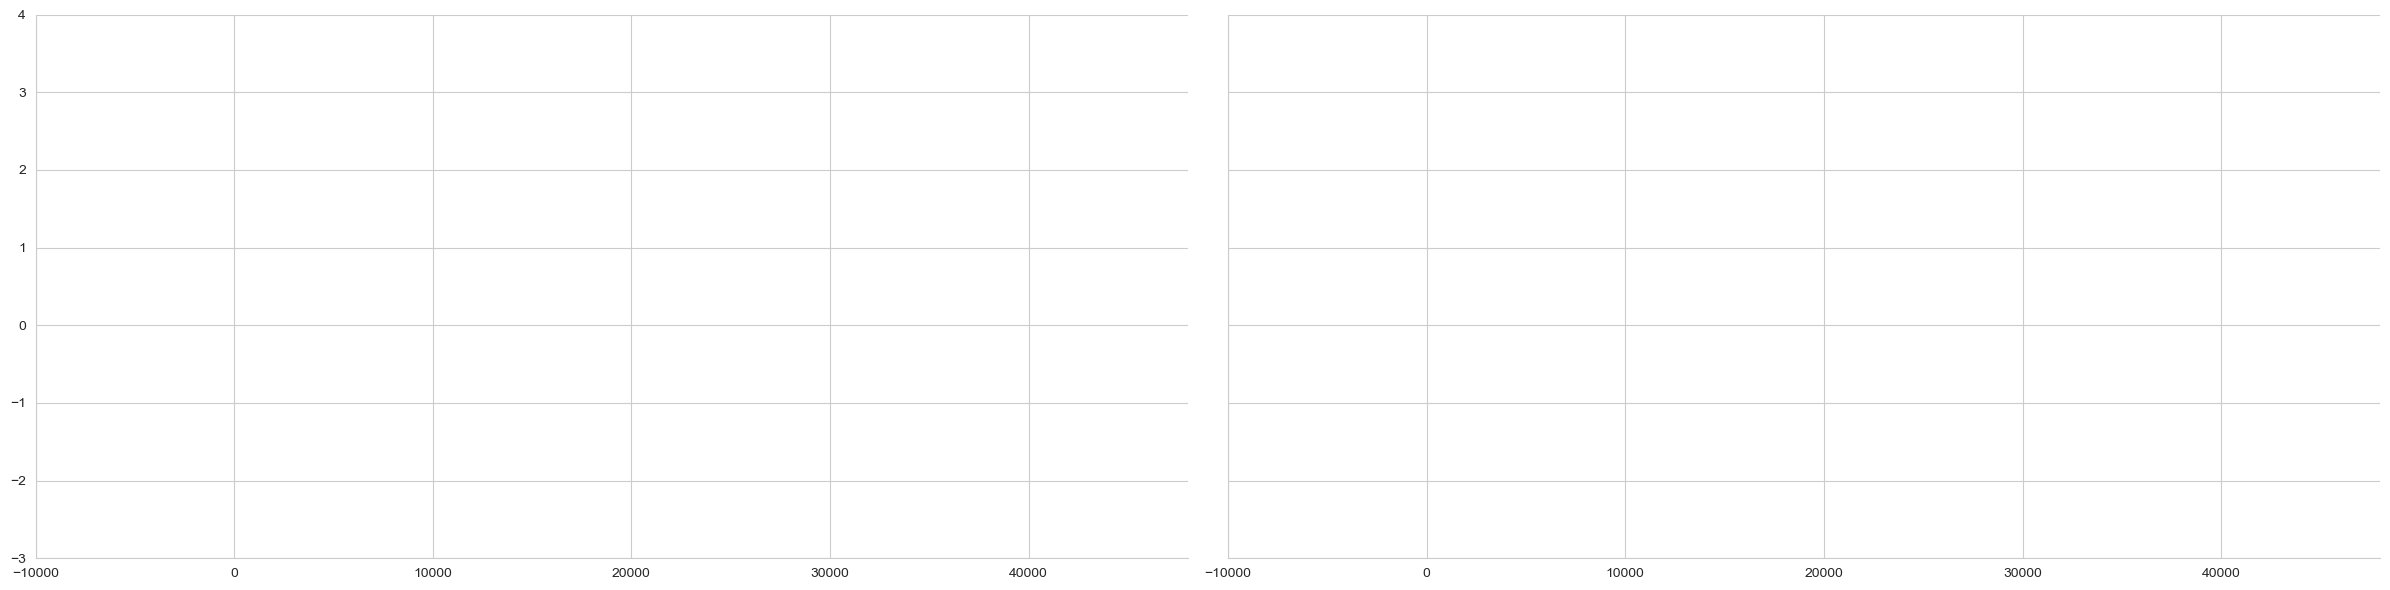

In [109]:
region_kdePlot(df_northAmerica, (-10000,48000))
region_kdePlot(df_NA, (-500000,1500000))

### South America

KeyError: "['Average_Temperature_C'] not in index"

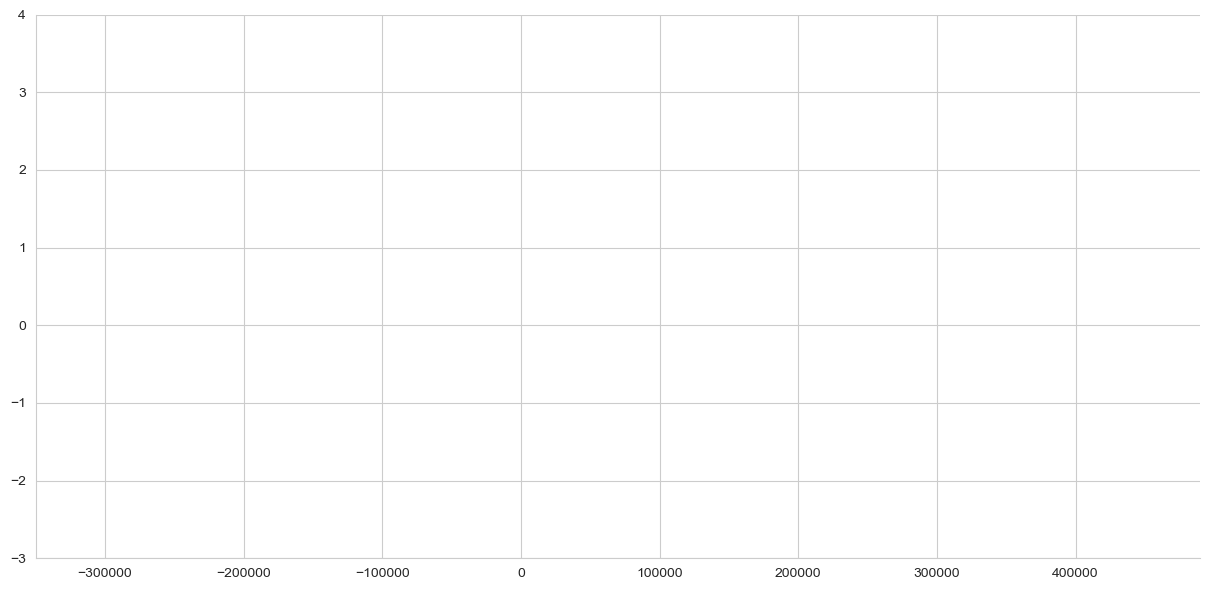

In [110]:
region_kdePlot(df_southamerica, (-350000,490000))

### Africa

KeyError: "['Average_Temperature_C'] not in index"

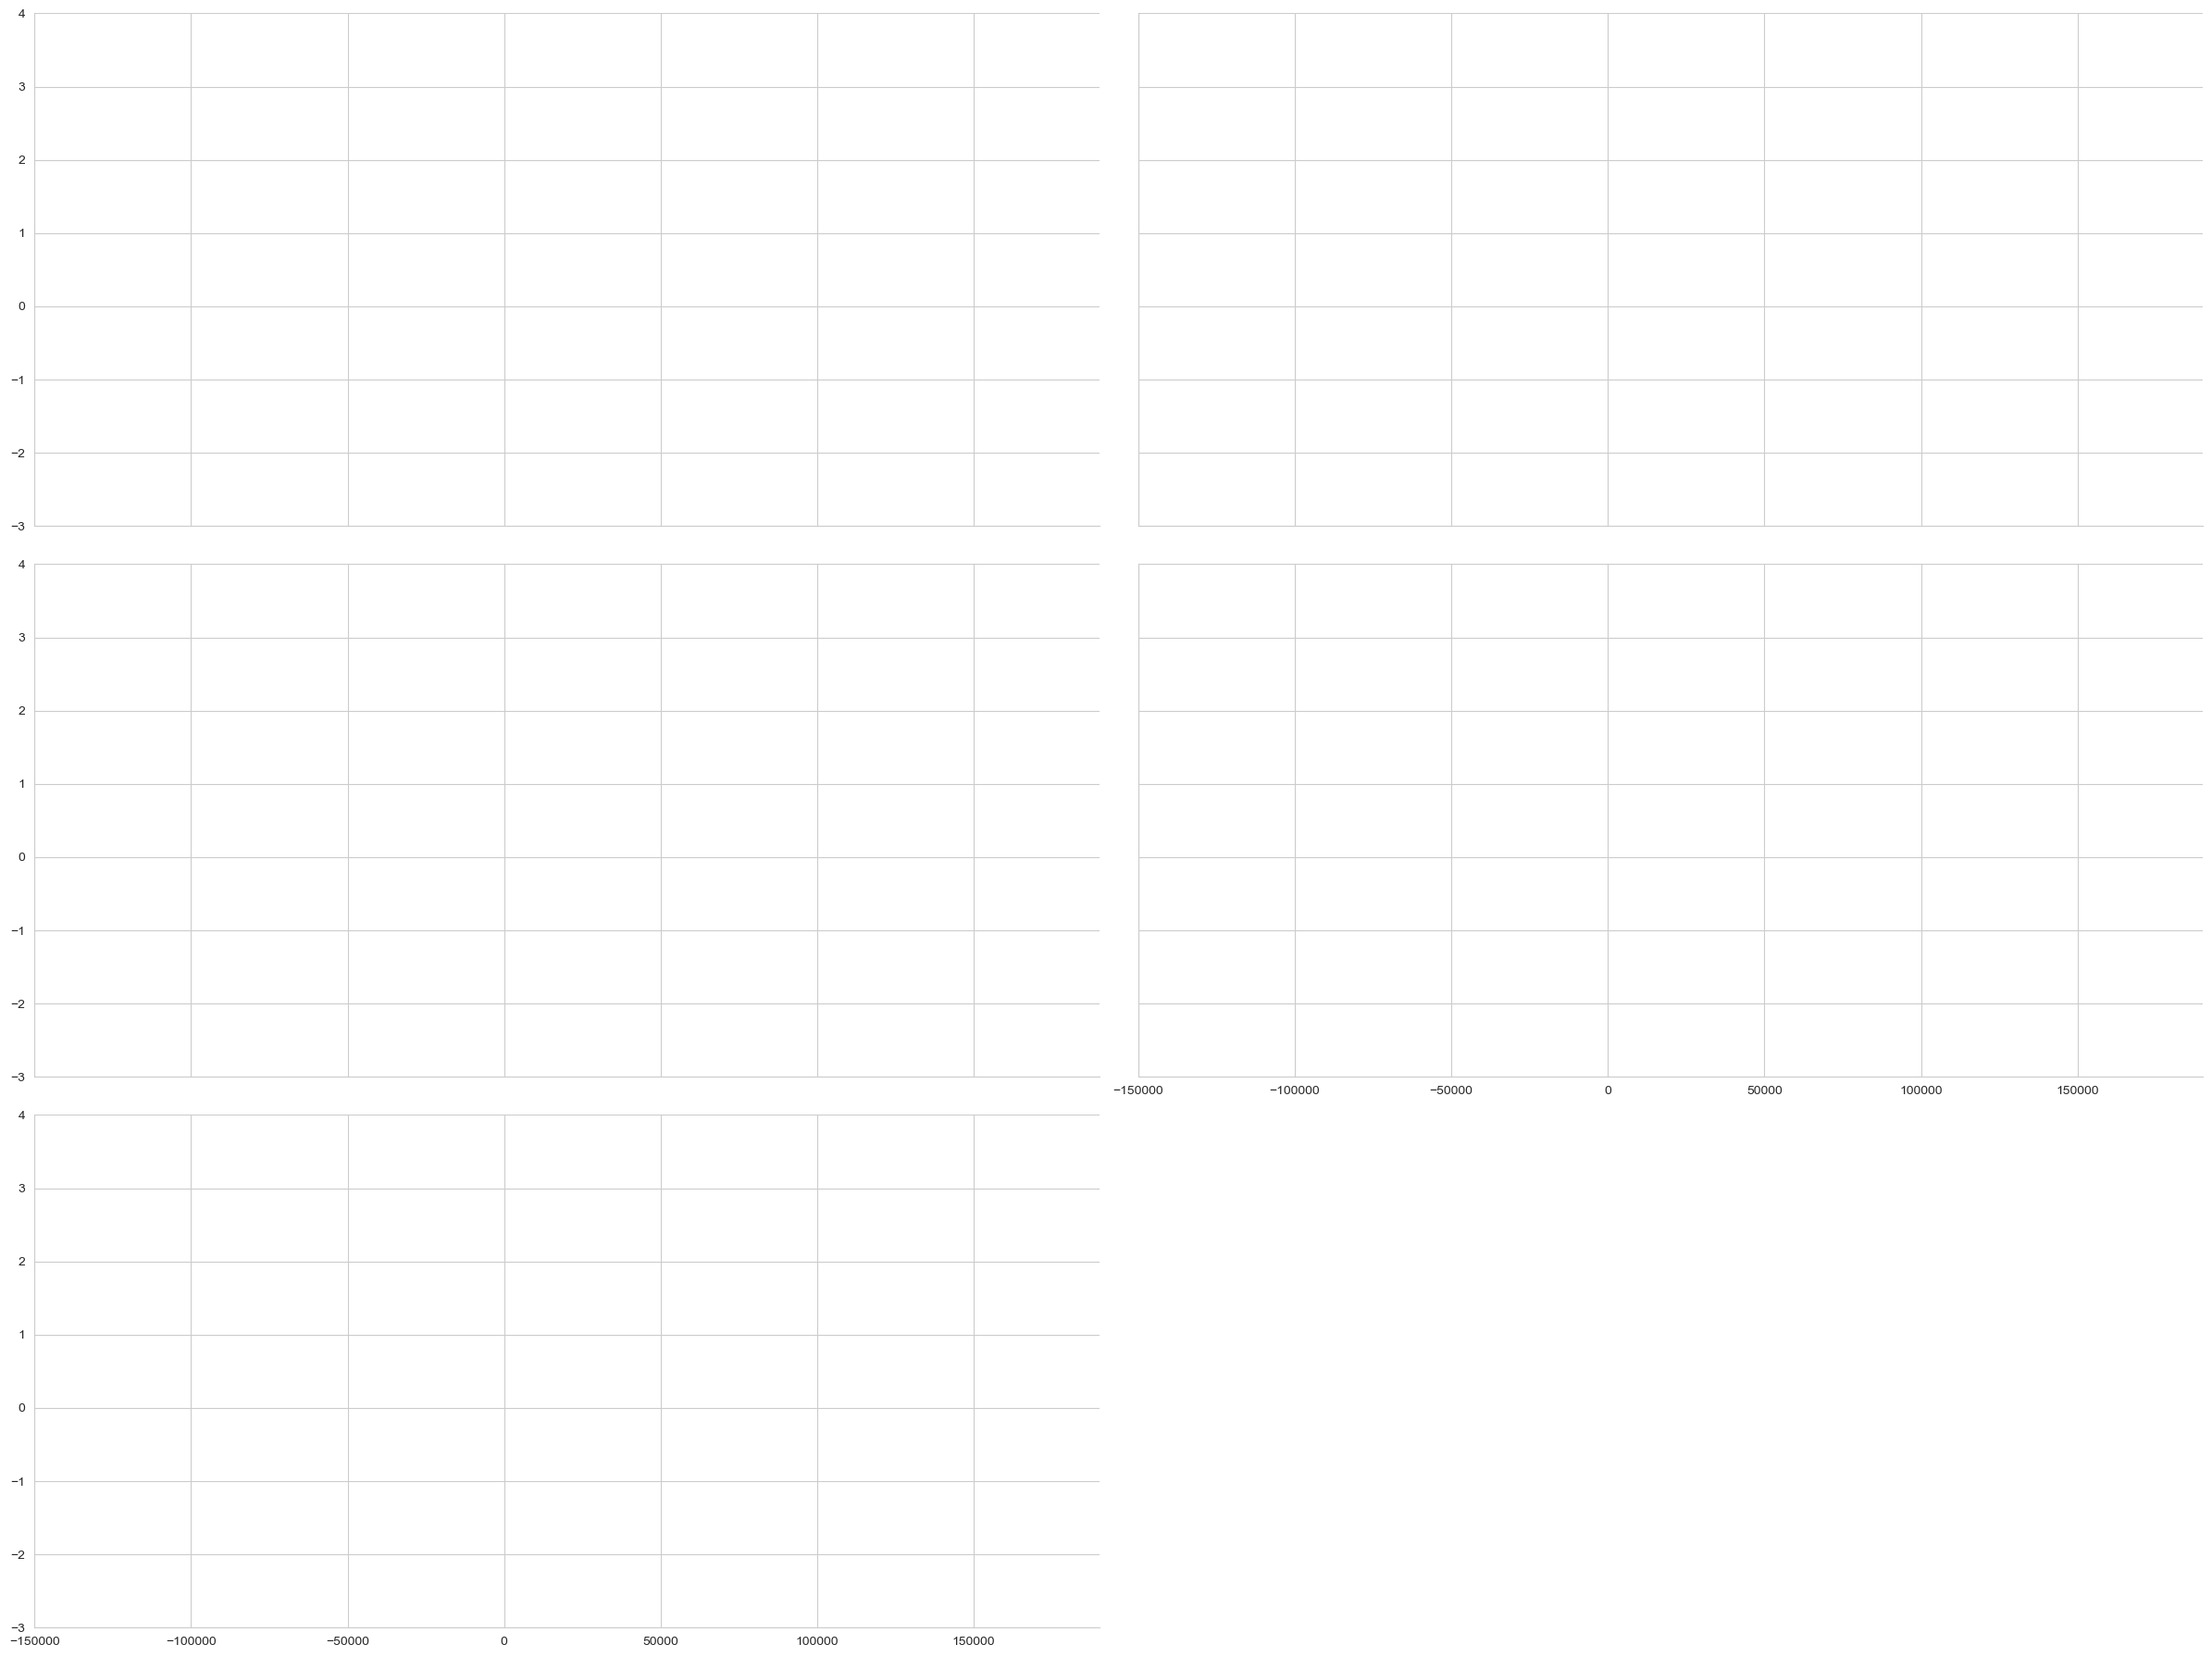

In [111]:
region_kdePlot(df_africa, (-150000,190000))

### Asia

KeyError: "['Average_Temperature_C'] not in index"

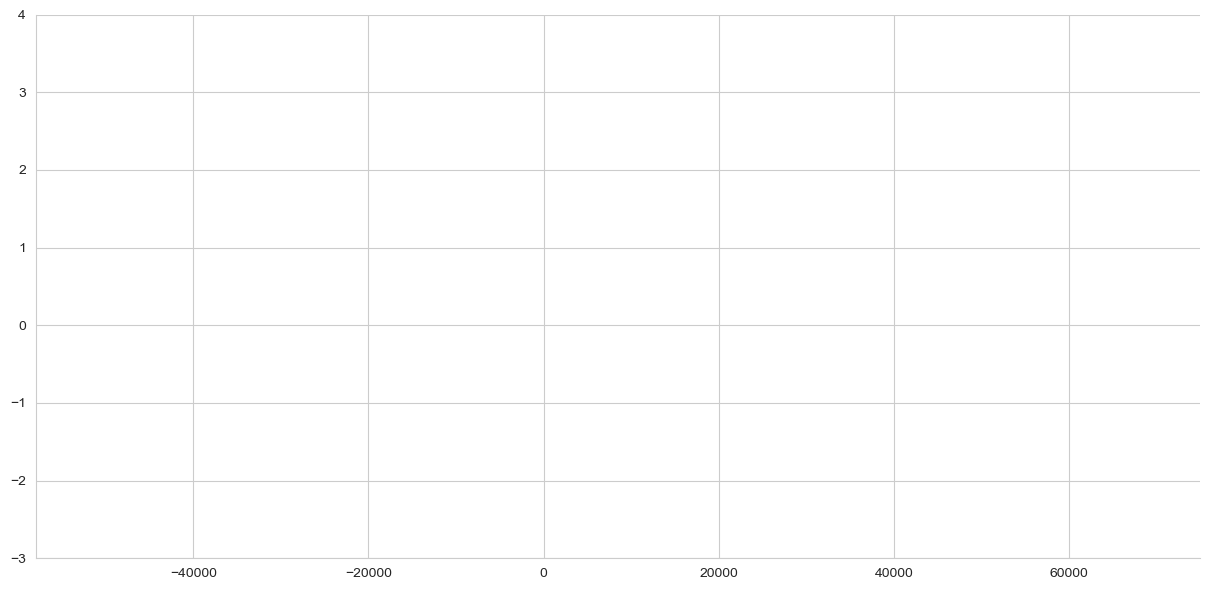

In [112]:
region_kdePlot(df_CA, (-58000,75000))
region_kdePlot(df_asia, (-580000,1100000))

### Australia and Oceania

KeyError: "['Average_Temperature_C'] not in index"

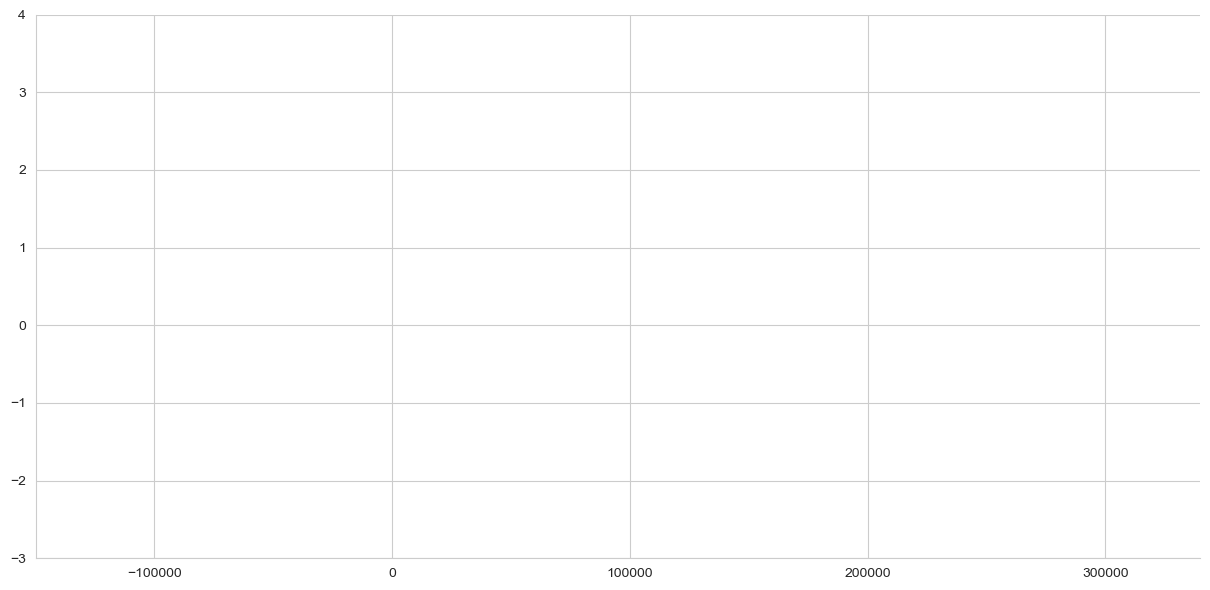

In [113]:
region_kdePlot(df_AU_NZ, (-150000,340000))
region_kdePlot(df_oceania, (-25000,70000))

## Emissions per capita

Let's have a look the emission per capita in the different regions instead of countries. 

In [114]:
df_emiPerCapita = df[['Area', 'Year', 'Forestland', 'total_emission', 'total_population','Continents','World_regions']]
df_emiPerCapita['Emission_Per_Capita'] = df_emiPerCapita['total_emission'] / df_emiPerCapita['total_population']
df = pd.concat([df, df_emiPerCapita['Emission_Per_Capita']], axis = 1)
df_emiPerCapita_mean = df_emiPerCapita.groupby('Area')['Emission_Per_Capita'].mean()
df_emiPerCapita_mean.sort_values(ascending = False).head(n=10).reset_index()

,Area,Emission_Per_Capita
0,Holy See,30.512951
1,Tokelau,4.707367
2,Falkland Islands,4.611468
3,"Saint Helena, Ascension and Tristan da Cunha",1.981689
4,Saint Pierre and Miquelon,1.659791
5,Niue,1.614958
6,Montserrat,1.593782
7,Anguilla,1.065676
8,Wallis and Futuna Islands,0.824501
9,British Virgin Islands,0.677127


We have a rather interesting result for the emission per capita. It seems that city-state and small islands are on the top of the list. This is due to the fact that the population is rather small on these places and to the emission in this dataset
has many contributing sources. the main sources for the emission are coming from food transport / packaging / disposal, household consumption and electricity use.

In [115]:
df_emiPCTail = df_emiPerCapita_mean.sort_values(ascending = True).head(n=10).reset_index()
df_emiPCTail

,Area,Emission_Per_Capita
0,Solomon Islands,-0.005859
1,Bulgaria,-0.001299
2,Slovenia,-0.001155
3,Chile,-0.001090
4,Russia,-0.001037
5,Romania,-0.000863
6,Finland,-0.000644
7,Latvia,-0.000552
8,Serbia and Montenegro,-0.000504
9,Bhutan,-0.000418


How much the Forestland - Carbon Sink - offsets the emission per capita? By looking at the least polluting countries compared how they are ranked by Forestland.

In [116]:
df_forest = df.groupby('Area')['Forestland'].sum().reset_index()
df_forest['Rank'] = df_forest['Forestland'].rank(ascending = True)

df_forest[df_forest['Area'].isin(df_emiPCTail['Area'])].sort_values(by = 'Rank')

,Area,Forestland,Rank
169,Russia,-1.871147e+07,1.0
168,Romania,-1.610836e+06,11.0
41,Chile,-1.293248e+06,17.0
70,Finland,-1.211285e+06,20.0
30,Bulgaria,-8.179881e+05,25.0
188,Solomon Islands,-3.715884e+05,37.0
110,Latvia,-3.533902e+05,38.0
187,Slovenia,-2.348045e+05,43.0
182,Serbia and Montenegro,-2.283227e+05,45.0
23,Bhutan,-1.519843e+05,51.0


The countries on the list with the less emission per capita are from countries that has somewhat significant forest coverage.    
There is only one country that is on the list of the emission per capita, Russia.    

In [117]:
df_forest.sort_values('Rank').head(10)

,Area,Forestland,Rank
169,Russia,-1.871147e+07,1.0
219,United States of America,-1.410334e+07,2.0
44,"China, mainland",-1.401762e+07,3.0
27,Brazil,-1.280256e+07,4.0
94,Indonesia,-5.811219e+06,5.0
93,India,-3.304575e+06,6.0
36,Canada,-2.976688e+06,7.0
102,Japan,-2.420289e+06,8.0
71,France,-1.719899e+06,9.0
191,South Korea,-1.641560e+06,10.0


Let's have a look the emission per capita by worldwide regions.

In [118]:
df_asiaEmiPerCap = df_emiPerCapita[df_emiPerCapita['Continents'] == 'Asia']
df_africaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Africa') & (df_emiPerCapita['World_regions'] != 'Southern Africa')]
df_SAfricaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Africa') & (df_emiPerCapita['World_regions'] == 'Southern Africa')]
df_europeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & ((df_emiPerCapita['World_regions'] != 'Southern Europe') & (df_emiPerCapita['World_regions'] != 'Eastern Europe'))]
df_sEuropeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & (df_emiPerCapita['World_regions'] == 'Southern Europe')]
df_eEuropeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & (df_emiPerCapita['World_regions'] == 'Eastern Europe')]
df_oceaniaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] != 'Polynesia') & (df_emiPerCapita['World_regions'] != 'Micronesia')]
df_poliEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] == 'Polynesia')]
df_microEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] == 'Micronesia')]
df_cariEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'Caribbean')]
df_NAEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'North America')]
df_CAEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'Central America')]
df_saEmiPerCap = df_emiPerCapita[df_emiPerCapita['Continents'] == 'South_America']


def emissionPerCapitaByContinent(dataset, ysettings):
     g = sns.FacetGrid(dataset,
                      col="World_regions",
                      col_wrap=2, height=6,
                      aspect = 2,
                      sharex = True,
                      ylim = ysettings
                  )
     g.map( sns.scatterplot,
               'total_population',
               'Emission_Per_Capita',
               hue = dataset['Area']
          )
     g.map( sns.kdeplot,
               'total_population',
               'Emission_Per_Capita',
          )
     g.set_titles(col_template="{col_name}")
     g.set(xlabel = 'Total population',
           ylabel = 'Emission per capita')
     g.add_legend()
     plt.show()

### Europe

AttributeError: 'DataFrame' object has no attribute 'iteritems'

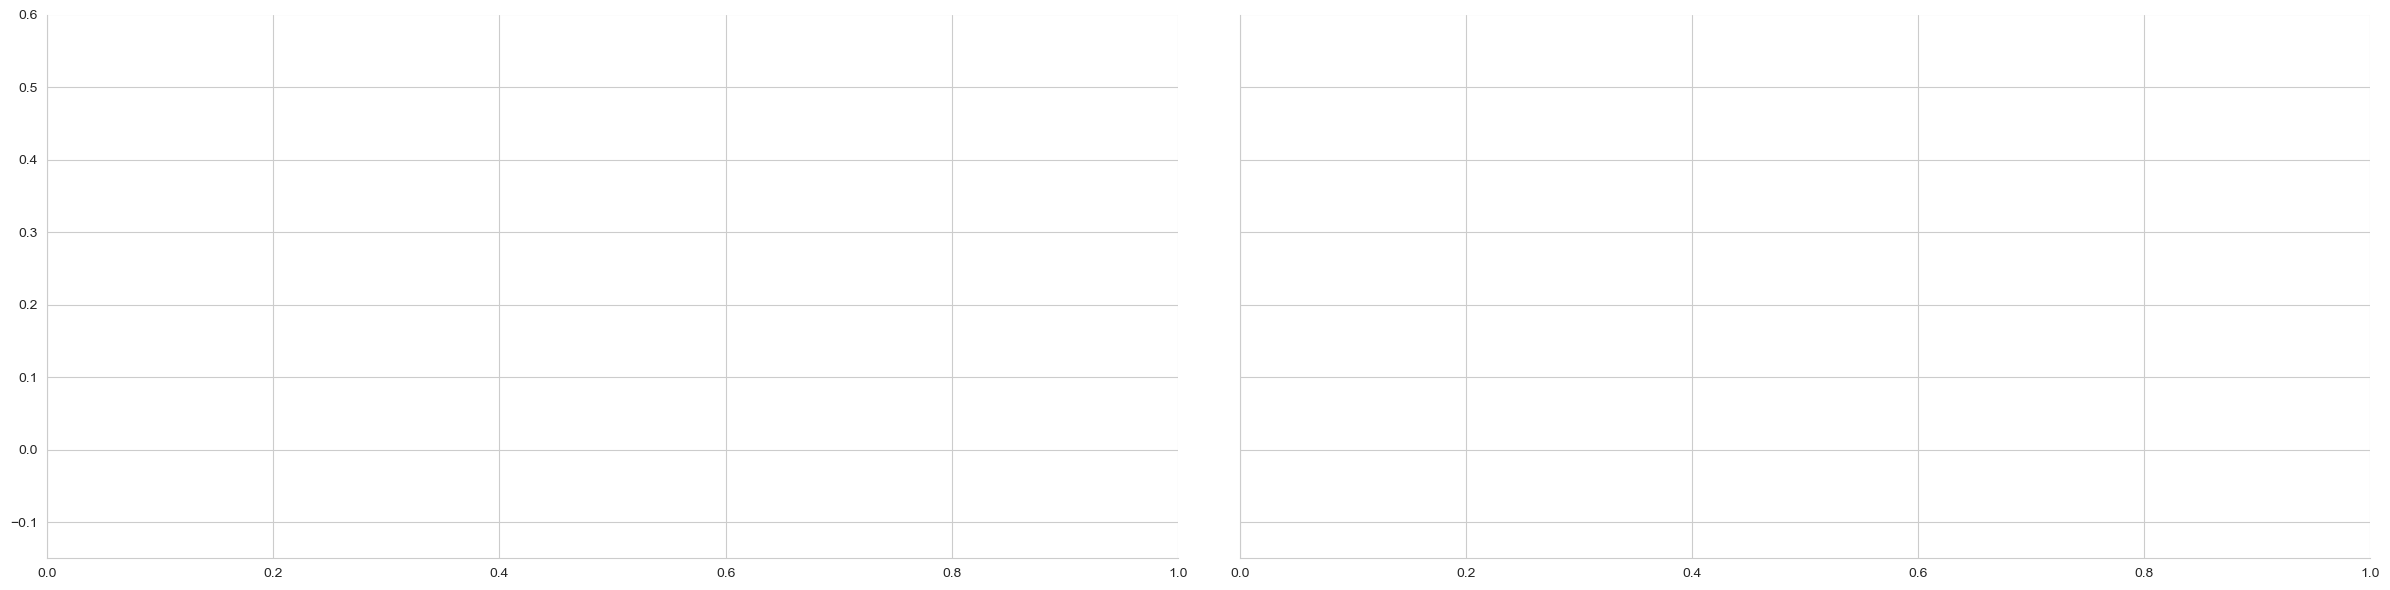

In [119]:
emissionPerCapitaByContinent(df_europeEmiPerCap, (-0.15,0.6))
emissionPerCapitaByContinent(df_eEuropeEmiPerCap, (-0.015, 0.01))
emissionPerCapitaByContinent(df_sEuropeEmiPerCap, (-10, 36))

### Asia

AttributeError: 'DataFrame' object has no attribute 'iteritems'

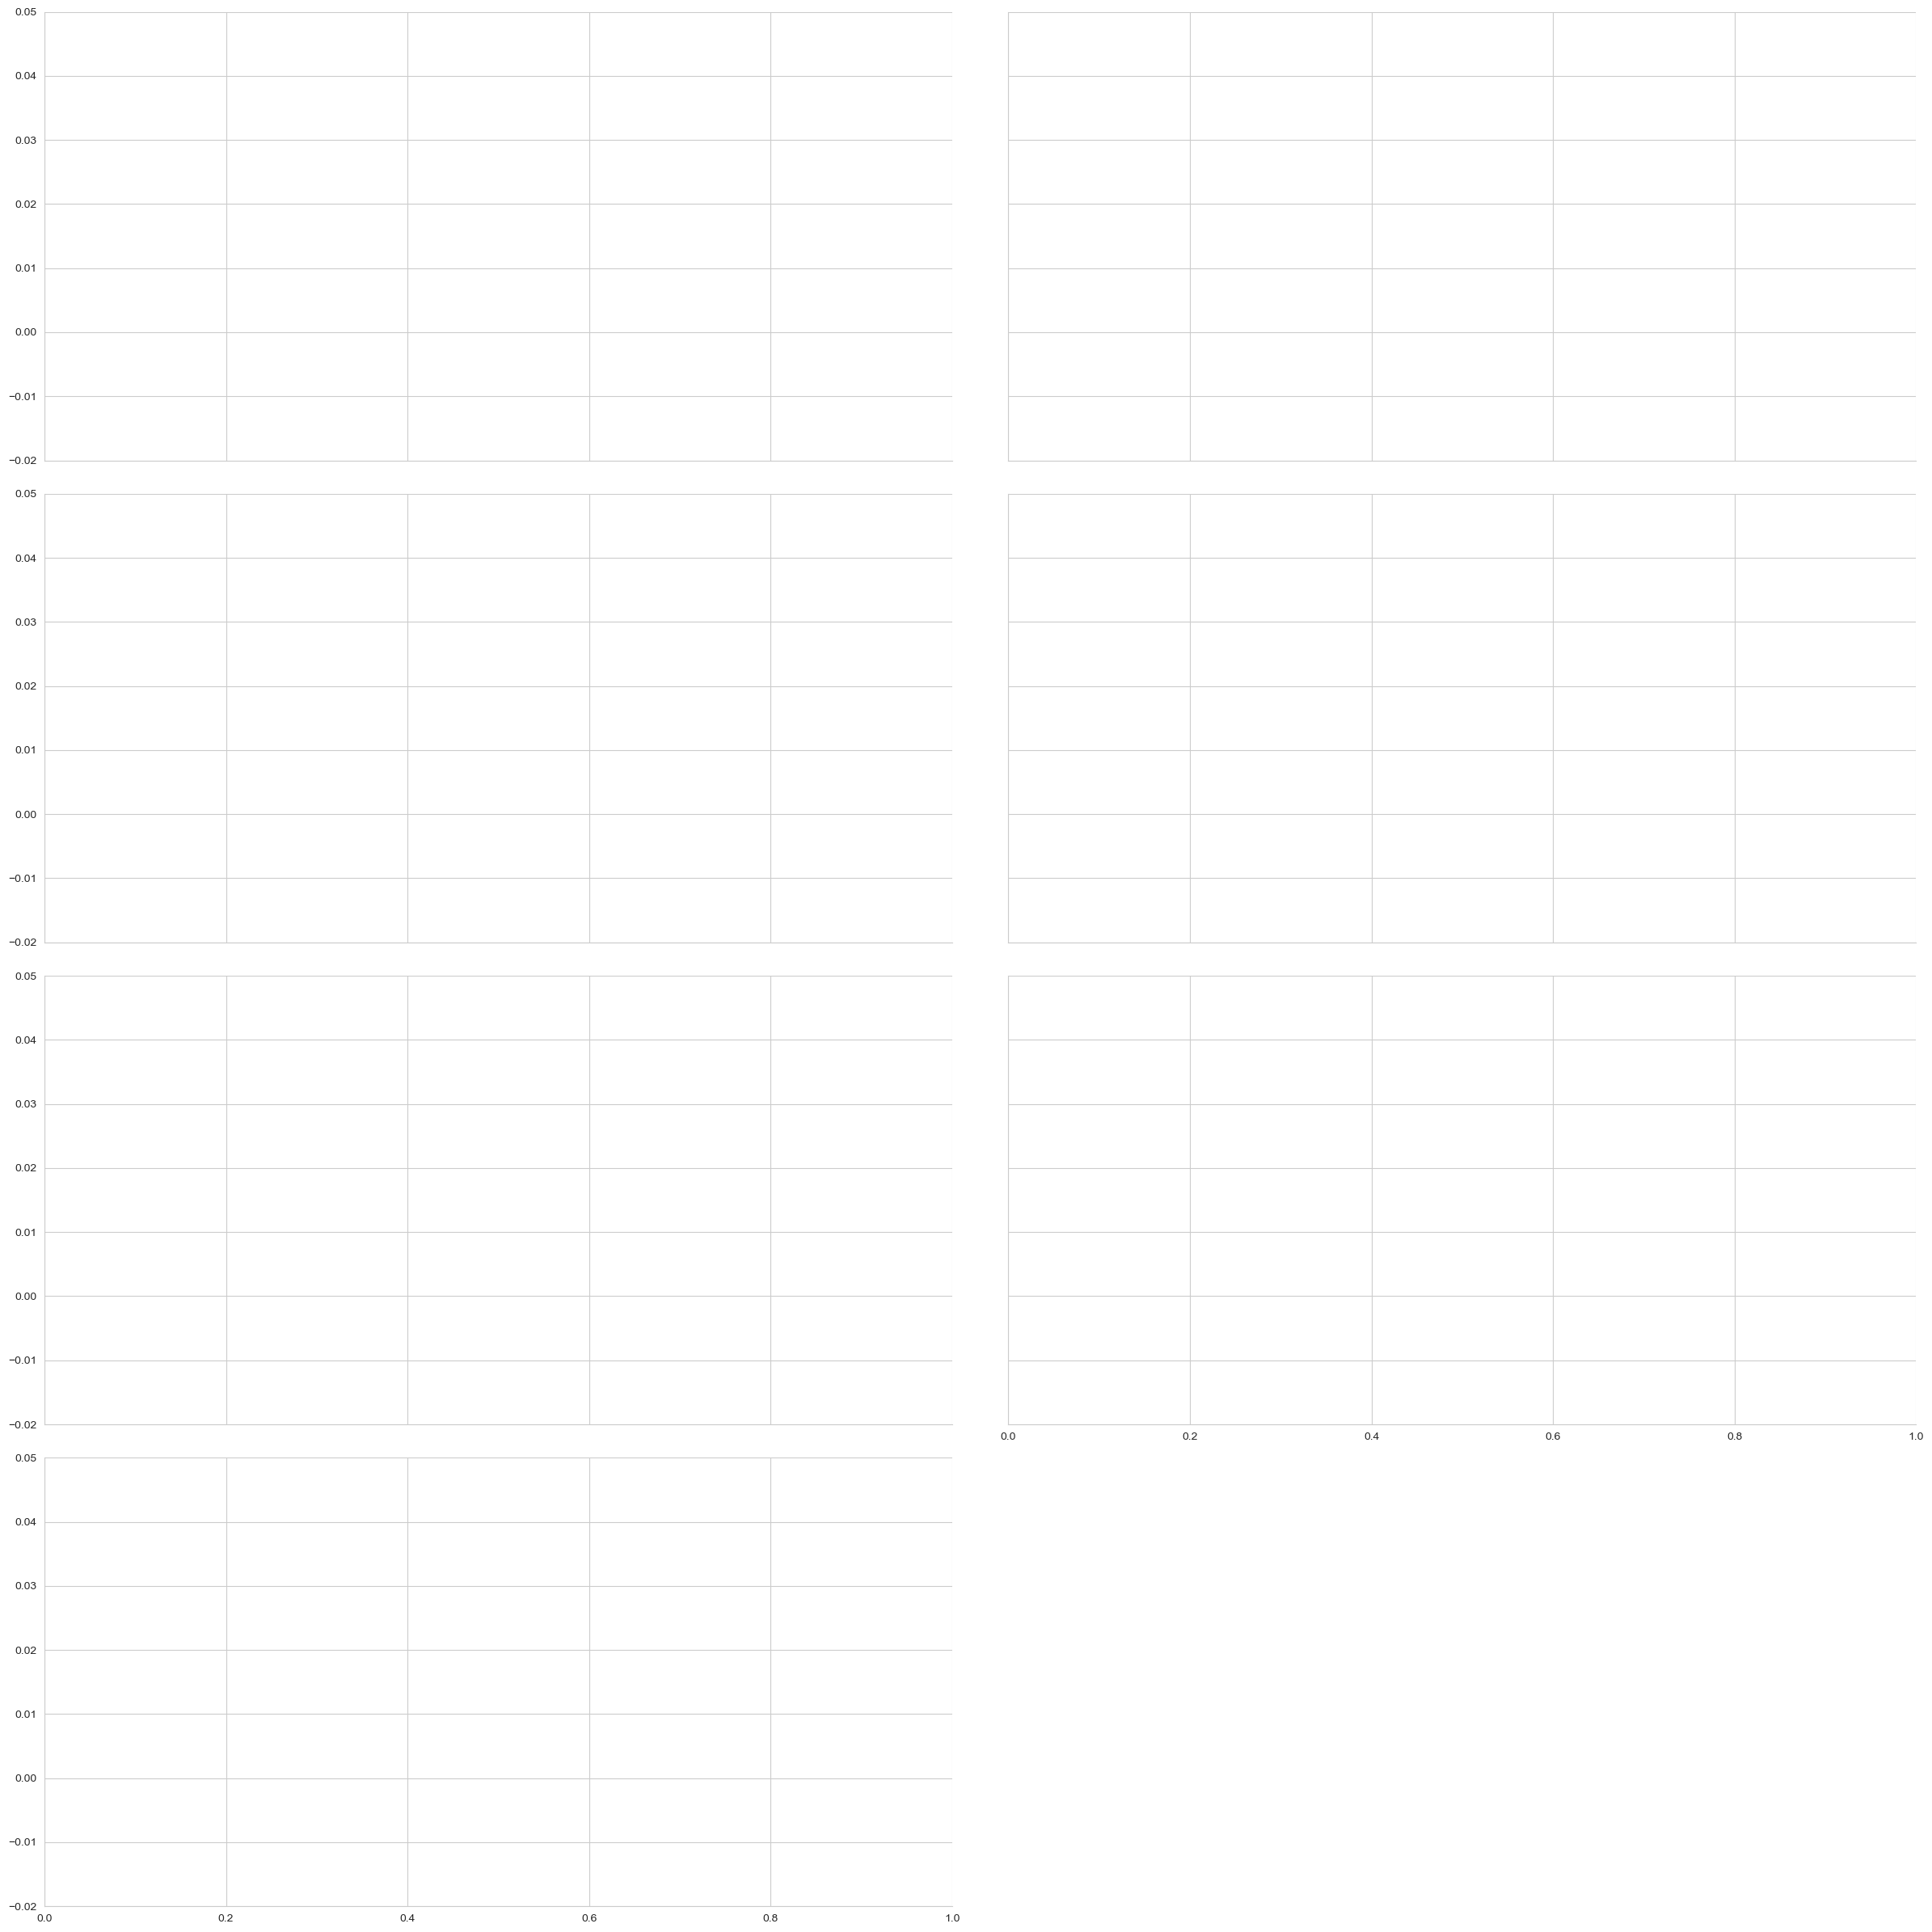

In [121]:
emissionPerCapitaByContinent(df_asiaEmiPerCap, (-0.02,0.05))

### Africa

AttributeError: 'DataFrame' object has no attribute 'iteritems'

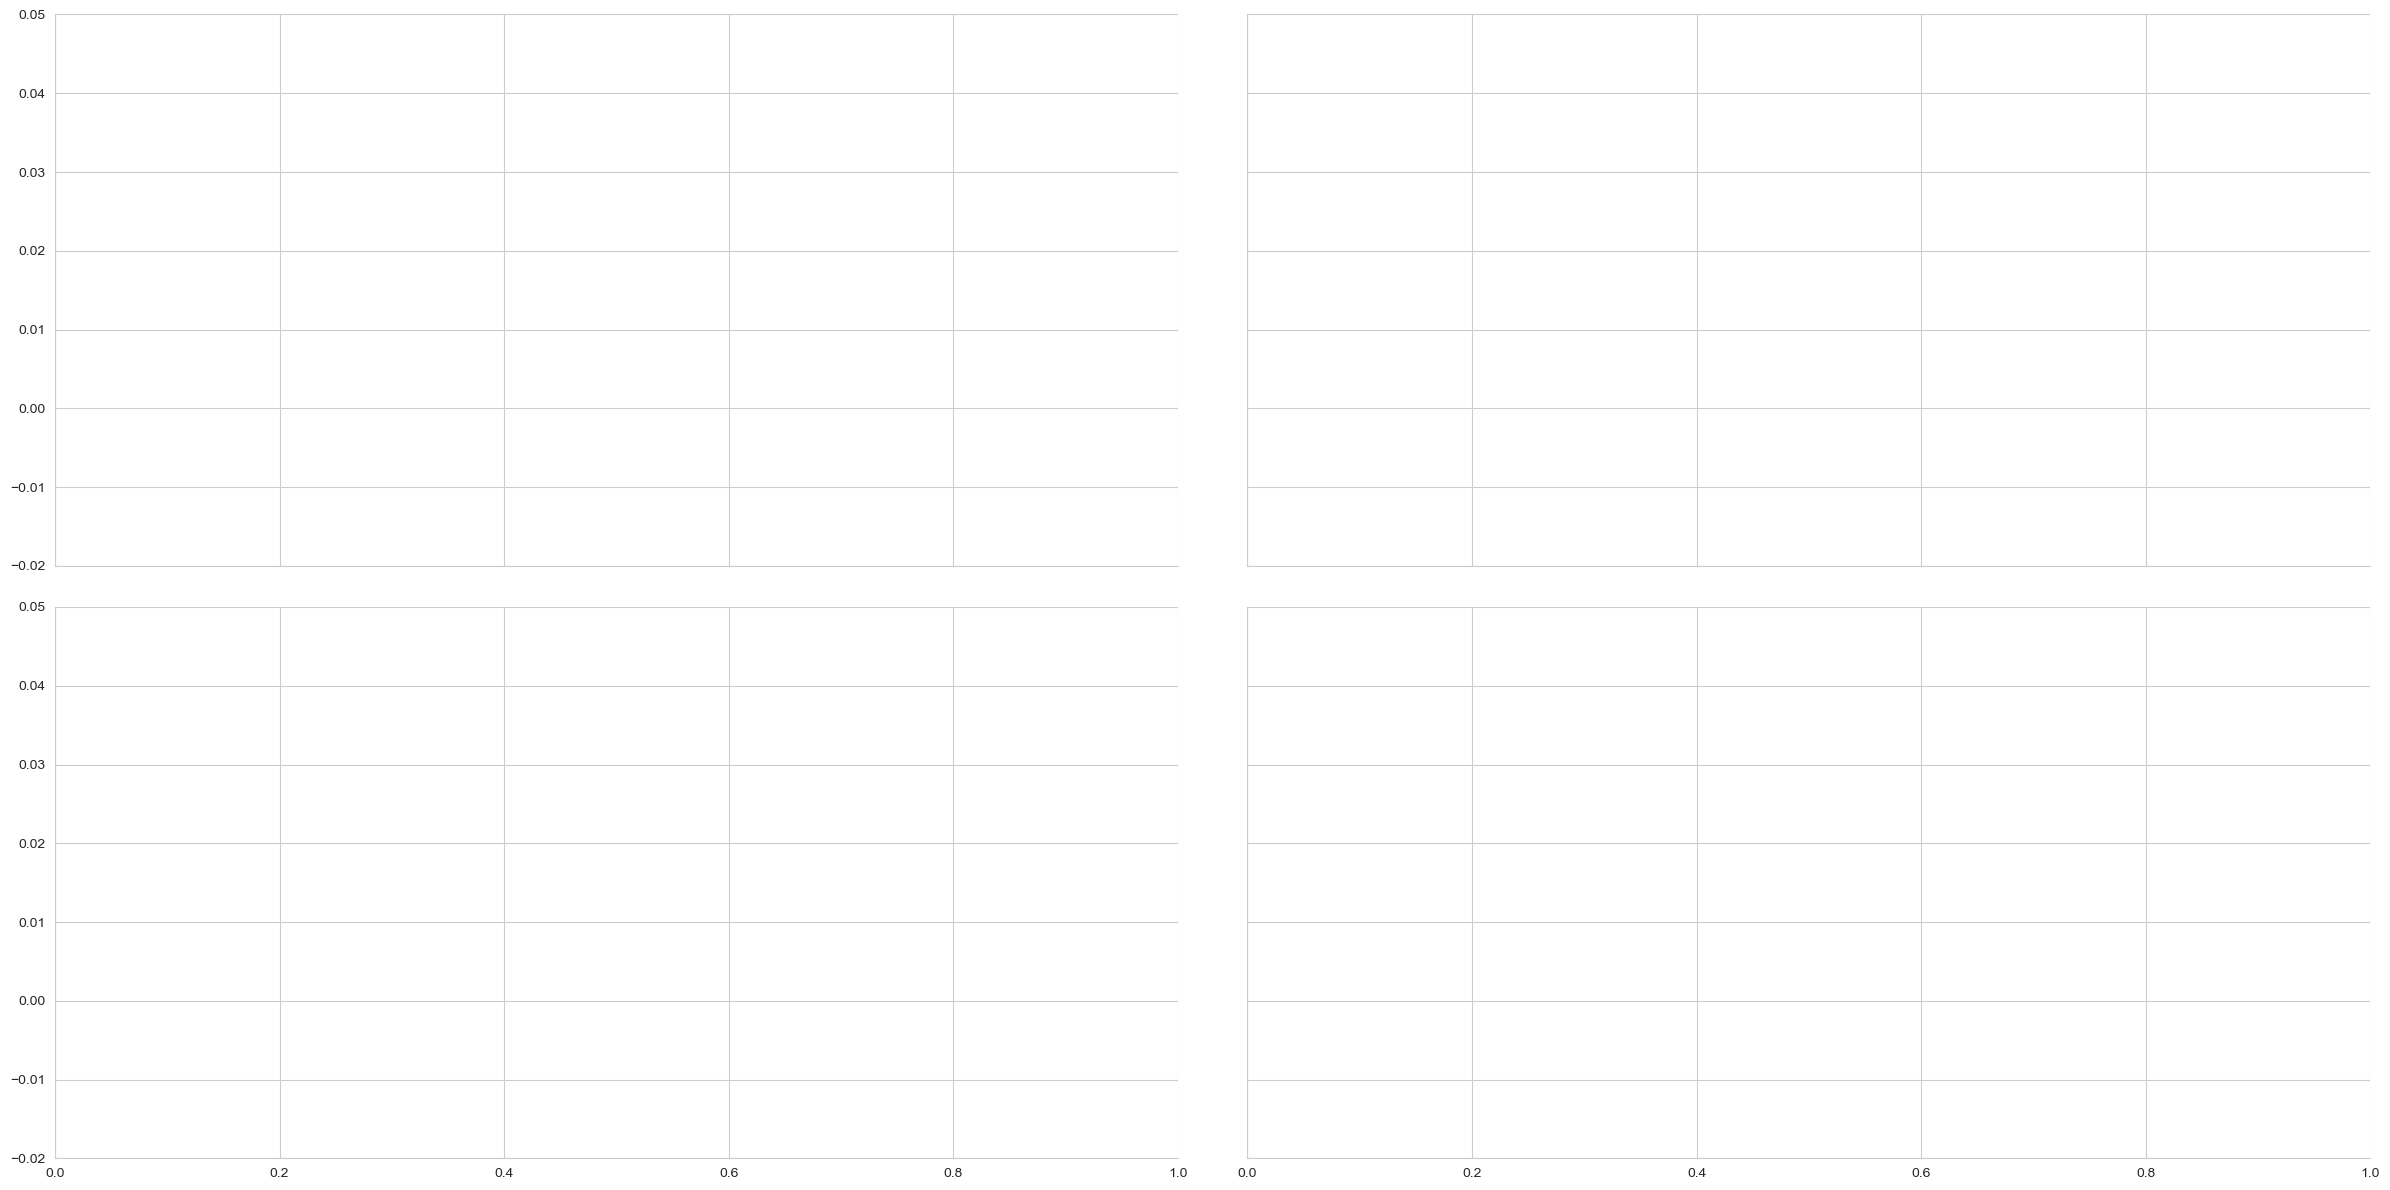

In [120]:
emissionPerCapitaByContinent(df_africaEmiPerCap, (-0.02,0.05))
emissionPerCapitaByContinent(df_SAfricaEmiPerCap, (-1,3))

### North America

AttributeError: 'DataFrame' object has no attribute 'iteritems'

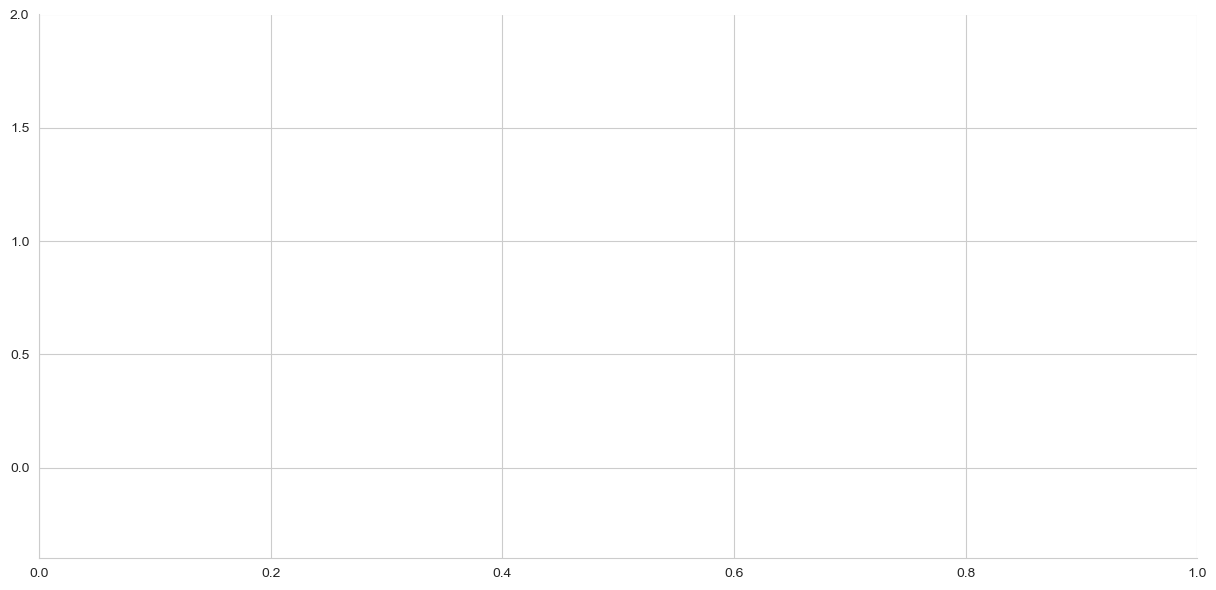

In [122]:
emissionPerCapitaByContinent(df_cariEmiPerCap, (-0.4, 2))
emissionPerCapitaByContinent(df_CAEmiPerCap, (-0.05, 0.1))
emissionPerCapitaByContinent(df_NAEmiPerCap, (-2, 2.5))


### South America

In [ ]:
emissionPerCapitaByContinent(df_saEmiPerCap, (-2, 2.5))

### Australia and Oceania

In [ ]:
emissionPerCapitaByContinent(df_oceaniaEmiPerCap, (-0.03, 0.09))
emissionPerCapitaByContinent(df_poliEmiPerCap, (-1.5, 3))
emissionPerCapitaByContinent(df_microEmiPerCap, (-0.5, 1))

## Statistics and Hypothesis testing

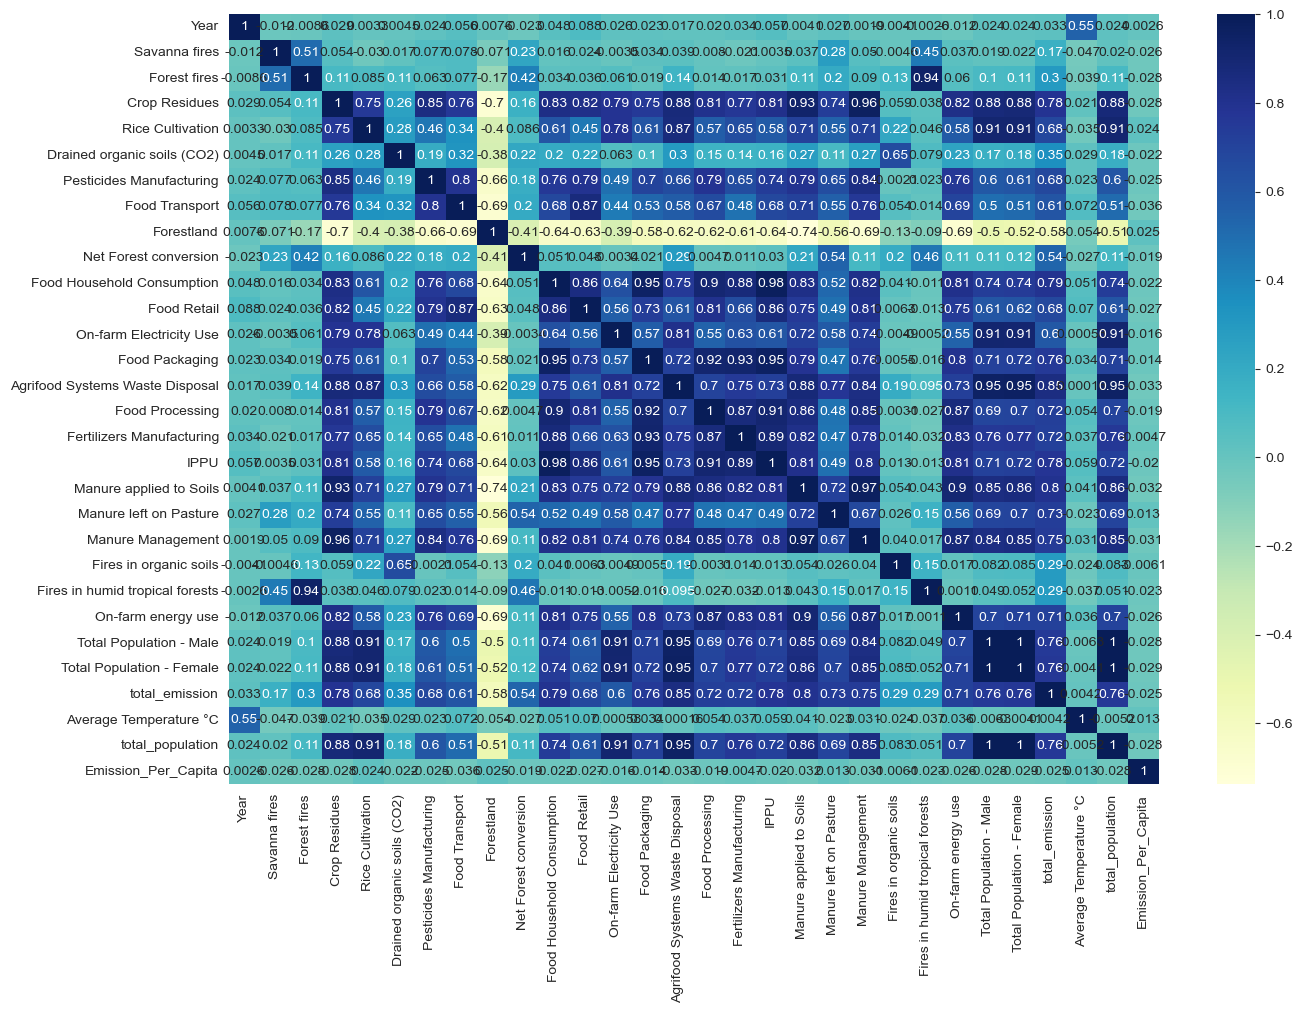

In [123]:
dataplot = df.drop(['Area', 'Continents', 'World_regions'], axis = 1)
sns.heatmap(dataplot.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [124]:
correlation = df.groupby('Year').agg({'total_emission':'sum','Average_Temperature_C':'mean','total_population':'sum', 'Forestland':'sum', 'Emission_Per_Capita':'mean'})
correlation.corr()

KeyError: "Column(s) ['Average_Temperature_C'] do not exist"

In [125]:
correlation['Year'] = correlation.index
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Average_Temperature_C',
            height = 10,
            aspect = 2,
            fit_reg = True)
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Emission_Per_Capita',
            height = 10,
            aspect = 2,
            fit_reg = True)
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'total_population',
            height = 10,
            aspect = 2,
            fit_reg = True)
plt.show()


NameError: name 'correlation' is not defined

In [126]:
df_grpd = df.groupby(['World_regions','Continents'])[['Average_Temperature_C','total_emission','Emission_Per_Capita']]\
                      .agg({'Average_Temperature_C':'mean','total_emission':'sum','Emission_Per_Capita':'mean'}, axis = 1)\
                      .sort_values(by = 'Continents').reset_index()
df_grpd

KeyError: "Columns not found: 'Average_Temperature_C'"

In [129]:
pg.qqplot(df_grpd['Average_Temperature_C'], dist='norm')

NameError: name 'df_grpd' is not defined

In [130]:
pg.qqplot(df_grpd['total_emission'], dist='norm')

NameError: name 'df_grpd' is not defined

In [ ]:
pg.qqplot(df_grpd['Emission_Per_Capita'], dist='norm')

In [ ]:
# Determining the homogeneity of variances
pg.homoscedasticity(data = df_grpd, dv = 'Average_Temperature_C', group = 'Continents')

In [128]:
# Determining the homogeneity of variances
pg.homoscedasticity(data = df_grpd, dv = 'total_emission', group = 'Continents')

NameError: name 'df_grpd' is not defined

In [127]:
# Determining the homogeneity of variances
pg.homoscedasticity(data = df_grpd, dv = 'Emission_Per_Capita', group = 'Continents')

NameError: name 'df_grpd' is not defined

The data has equal variances for all numerical variables hence we can perform a simple one way ANOVA to decide whether there is    
statistically significant difference between the groups (here we are interested between Continents).    
The null hypothesis H0 is that there is no difference between the groups and the alternative hypothesis Ha is NOT H0.

In [ ]:
# One way ANOVA test for Avg Temperatuce
pg.anova(data=df_grpd, dv='Average_Temperature_C', between='Continents', detailed=True)

In [ ]:
# One way ANOVA test for total emission
pg.anova(data=df_grpd, dv='total_emission', between='Continents', detailed=True)

In [ ]:
# One way ANOVA test for emission per capita
pg.anova(data=df_grpd, dv='Emission_Per_Capita', between='Continents', detailed=True)

We can conclude that there is statistically significant difference between the groups in case of temperature and emission hence we reject H0.    
The ANOVA doesn't tell us which groups are different, in order to find which groups are differ from each other we need to perform a post-hoc test.    
As the groups are balanced we can use the Tukey-HSD test.

In [ ]:
# Tukey-HSD test for Avg Temperature
pg.pairwise_tukey(data = df_grpd, dv='Average_Temperature_C', between='Continents').round(5)

The post-hoc test confirms our earlier assumption from the data visualization, that Europe is the most effected region among all the continents.   
The pairwise test tells us that Europe is different from all other continents in term of average temperature rise due to CO2 emissions.

In [ ]:
# Tukey-HSD test for total emission
pg.pairwise_tukey(data = df_grpd, dv='total_emission', between='Continents').round(5)

From this post-hoc test we can conclude that there is no significant difference in terms of total emission however between Oceania and South-America it's close to the significant limit.

## Predictions for CO2 emission

In [ ]:
df_tsa = df.groupby(['Year', 'Continents'])[['Average_Temperature_C','total_emission','Emission_Per_Capita']]\
                      .agg({'Average_Temperature_C':'mean','total_emission':'sum','Emission_Per_Capita':'mean'}, axis = 1)\
                      .sort_values(by = 'Year').reset_index()
df_tsa_temp = df_tsa[['Year', 'Continents','Average_Temperature_C']]
df_tsa_temp = df_tsa_temp.pivot(index = 'Year', columns = 'Continents', values = 'Average_Temperature_C')
df_tsa_temp

### Prediction for Europe

Based on the available data, we try to predict the next few years of temperature change. However the dataset only contains the agricultural emissions    
and the temperature change is possible due to the global emission from all sources, it's most likely going to be off from reality.

In [ ]:
df_tsa_temp.index = pd.to_datetime(df_tsa_temp.index, format = '%Y')
result = adfuller(df_tsa_temp['Europe'])
print("The p-value for the ADF test is ", result[1])    # it's a random walk with a drift

# Plot the ACF
plot_acf(df_tsa_temp['Europe'], lags=30)
plt.show()

In [ ]:
# Taking the first difference of Europe to make it stationary
df_tsa_europe_chg = df_tsa_temp['Europe'].diff(2)
df_tsa_europe_chg = df_tsa_europe_chg.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(df_tsa_europe_chg, lags=28, ax=axes[0])

# Plot the PACF
plot_pacf(df_tsa_europe_chg, lags=13, ax=axes[1])
plt.show() 

In [ ]:
def fitARIMAModel(df, order):
    mod = ARIMA(df, order = order)
    res = mod.fit()
    print('The AIC for order: ',order, 'is: ', res.aic)

def bestAICScore(df, p_values,d_values,q_values):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    fitARIMAModel(df, order)
                except:
                    continue

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 2)

bestAICScore(df_tsa_europe_chg, p_values, d_values, q_values)

In [ ]:
# ARMA model
mod = ARIMA(df_tsa_europe_chg, trend=[0,1,2], order=(2,0,1))
res = mod.fit()

# ARMA model with trend forecasting
fig, ax = plt.subplots()
df_tsa_europe_chg.plot(ax=ax)
plot_predict(res, start='1992', end='2025', ax=ax)
plt.show()

### Prediction for Asia

We make the same assumtion for Asia about the dataset.

In [ ]:
df_tsa_temp.index = pd.to_datetime(df_tsa_temp.index, format = '%Y')
result = adfuller(df_tsa_temp['Asia'])
print("The p-value for the ADF test is ", result[1])    # it's a random walk with a drift

# Plot the ACF
plot_acf(df_tsa_temp['Asia'], lags=30)
plt.show()

In [ ]:
# Taking the second difference of Asia to make it stationary
df_tsa_asia_chg = df_tsa_temp['Asia'].diff(2)
df_tsa_asia_chg = df_tsa_asia_chg.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(df_tsa_asia_chg, lags=28, ax=axes[0])

# Plot the PACF
plot_pacf(df_tsa_asia_chg, lags=13, ax=axes[1])
plt.show() 

In [ ]:


def fitARIMAModel(df, order):
    mod = ARIMA(df, order = order)
    res = mod.fit()
    print('The AIC for order: ',order, 'is: ', res.aic)

def bestAICScore(df, p_values,d_values,q_values):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    fitARIMAModel(df, order)
                except:
                    continue

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 2)

bestAICScore(df_tsa_asia_chg, p_values, d_values, q_values)

In [ ]:
# ARMA model
mod = ARIMA(df_tsa_asia_chg, order=(2,0,1))
res = mod.fit()


# ARMA model with trend forecasting
fig, ax = plt.subplots()
df_tsa_asia_chg.plot(ax=ax)
plot_predict(res, start='1992', end='2025', ax=ax)
plt.show()

## Modelling

In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Added OneHotEncoder import
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


target_column = 'Area'

# Check for missing values
if df.isnull().sum().any():
    print("Warning: Missing values detected in the dataset.")

# Define features and target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ]
)

# Create a pipeline that first transforms the data and then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters from Grid Search:", grid_search.best_params_)

# Evaluate the best model
best_model_predictions = grid_search.predict(X_test)
best_model_accuracy = accuracy_score(y_test, best_model_predictions)
print("Best Model Accuracy:", best_model_accuracy)

Accuracy: 0.9975973089860644

Classification Report:
                                                       precision    recall  f1-score   support

                                         Afghanistan       1.00      1.00      1.00         8
                                             Albania       1.00      1.00      1.00        11
                                             Algeria       1.00      1.00      1.00        13
                                      American Samoa       1.00      1.00      1.00        12
                                             Andorra       1.00      1.00      1.00         7
                                              Angola       1.00      1.00      1.00        13
                                            Anguilla       1.00      1.00      1.00         7
                                 Antigua and Barbuda       1.00      1.00      1.00        11
                                           Argentina       1.00      1.00      1.00        10
     

KeyboardInterrupt: 